# Zomato_Restaurant_Project :-  DataTrained   |   

# Evaluation_Project_10


#### Submitted by: Tamali Saha (tamali428@gmail.com)

## Problem Statement:

Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

#### Data Storage:

#### Problem statement : In this dataset predict 2 things –
1) Average Cost for two
2) Price range

##### Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets
Downlaod Files:
https://github.com/dsrscientist/dataset4/blob/main/Country-Code.xlsx

https://github.com/dsrscientist/dataset4/blob/main/zomato.csv

### Import necessary libraries:

In [240]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

### Import data from github and start the preprocessing steps:

In [241]:
# import data

data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv",sep=',', encoding='latin-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [3]:
# checking shapes

data.shape

(9551, 21)

#### Observations:

This Dataset has 9551 rows and 21 columns. Let's study the column's names and their charectaristics.

In [4]:
# checking columns names

data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

#### Observations:
1. Among 19 features, 13 are object datatype and 5 are numarical data.
2. For all 20 columns, all are non-null value except Cuisines.

In [6]:
data.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

#### Observations:

1. Here Switch to order menu have 1 value for total dataset. Let's drop it.
2. Restaurant ID have different value for every different entries. Drop this column.

### Drop Unnecessary columns:

In [242]:
data.drop(["Restaurant ID", 'Switch to order menu'], axis=1, inplace= True)
data.shape

(9551, 19)

### Renaming:

In [243]:
data.rename(columns={'Restaurant Name': 'Restaurant_Name', 'Country Code': 'Country_Code', 'Locality Verbose': 'Locality_Verbose', 
        'Average Cost for two':'Average_Cost_for_two','Has Table booking':'Has_Table_booking',
        'Has Online delivery':'Has_Online_delivery', 'Is delivering now':'Is_delivering_now','Rating text':'Rating_text',
        'Price range':'Price_range', 'Aggregate rating':'Aggregate_rating','Rating color':'Rating_color'}, inplace=True)

### Checking duplicate:

In [244]:
data.duplicated().sum()

0

#### Observatios:

The dataset is free from duplicates.

### Let check if any whitespace, 'NA', '?' or '-' exist in dataset

In [10]:
data.isin([' ','NA','-']).sum().any()

False

In [11]:
data.isin(['?']).sum().any()

False

#### Observations:

Dataset is free from ' ', 'NA' ,'-', '?'

### Checking Null:

In [245]:
null_val= data.isna().sum()
null_val_per =(null_val/data.shape[0])*100
l= [null_val, null_val_per]
print("missing value details \n\n", pd.concat(l, axis =1, keys =['Null Values', 'Null Values %']).sort_values('Null Values'))

missing value details 

                       Null Values  Null Values %
Restaurant_Name                 0       0.000000
Rating_color                    0       0.000000
Aggregate_rating                0       0.000000
Price_range                     0       0.000000
Is_delivering_now               0       0.000000
Has_Online_delivery             0       0.000000
Has_Table_booking               0       0.000000
Currency                        0       0.000000
Rating_text                     0       0.000000
Average_Cost_for_two            0       0.000000
Latitude                        0       0.000000
Longitude                       0       0.000000
Locality_Verbose                0       0.000000
Locality                        0       0.000000
Address                         0       0.000000
City                            0       0.000000
Country_Code                    0       0.000000
Votes                           0       0.000000
Cuisines                        9       0.09

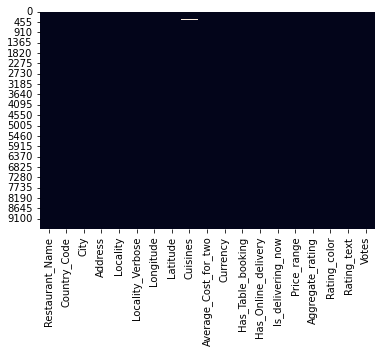

In [246]:
sns.heatmap(data.isnull(),cbar=False)
plt.show()

#### Observations: 

1. Null values are present in the total dataset.
2. The feature containing missing values are categorical in nature. Let's impute them with mode of that particular category.

### Missing value imputation:

In [247]:
data['Cuisines'].mode()

0    North Indian
Name: Cuisines, dtype: object

In [248]:
data['Cuisines'].fillna(data['Cuisines'].mode()[0],inplace=True)

All missing value is imputed.

### Statistical features:

In [249]:
data.describe()

,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [250]:
data.describe(include=object).T

,count,unique,top,freq
Restaurant_Name,9551,7446,Cafe Coffee Day,83
City,9551,141,New Delhi,5473
Address,9551,8918,"Dilli Haat, INA, New Delhi",11
Locality,9551,1208,Connaught Place,122
Locality_Verbose,9551,1265,"Connaught Place, New Delhi",122
Cuisines,9551,1825,North Indian,945
Currency,9551,12,Indian Rupees(Rs.),8652
Has_Table_booking,9551,2,No,8393
Has_Online_delivery,9551,2,No,7100
Is_delivering_now,9551,2,No,9517


#### Observations:

1. Outliers are present in numarical dataset.
2. Seems price range is discrete numarical data.
3. Here target variable are two. They are,  Average_Cost_for_two and Price_range.
4. Average_Cost_for_two is a numarical data(target1).
5. Price_range is a numarical data(target1).

### Differentiate Numarical and Categorical Data:

In [251]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Country_Code', 'Average_Cost_for_two', 'Price_range', 'Votes'], float64: ['Longitude', 'Latitude', 'Aggregate_rating'], object: ['Restaurant_Name', 'City', 'Address', 'Locality', 'Locality_Verbose', 'Cuisines', 'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Rating_color', 'Rating_text']}

In [252]:
num_col= ['Country_Code', 'Average_Cost_for_two', 'Price_range', 'Votes', 'Longitude', 'Latitude', 'Aggregate_rating']

cat_col= ['Restaurant_Name', 'City', 'Address', 'Locality', 'Locality_Verbose', 'Cuisines', 'Currency', 
               'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Rating_color', 'Rating_text']

### Exploratory Data Analysis(EDA):

### Univariate Analysis (Categorical and Numarical Data Analysis):

In [253]:
data['Currency'].value_counts()

Indian Rupees(Rs.)        8652
Dollar($)                  482
Pounds(£)                  80
Brazilian Real(R$)          60
Emirati Diram(AED)          60
Rand(R)                     60
NewZealand($)               40
Turkish Lira(TL)            34
Botswana Pula(P)            22
Indonesian Rupiah(IDR)      21
Qatari Rial(QR)             20
Sri Lankan Rupee(LKR)       20
Name: Currency, dtype: int64

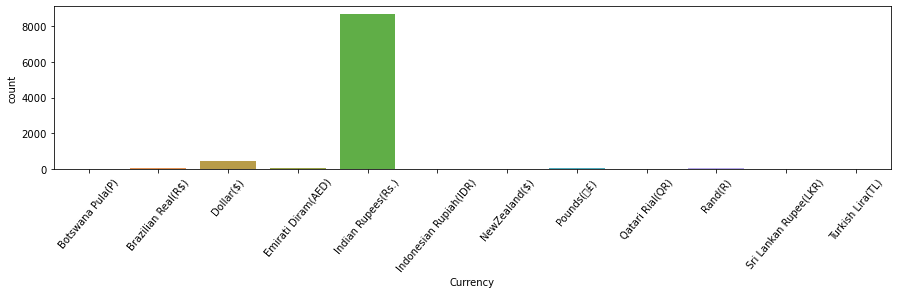

In [254]:
plt.figure(figsize=(15,3))
sns.countplot(data["Currency"])
plt.xticks(rotation=50)
plt.show()

#### Observations:

1. Among 9551, 8652 is Indian Rupees(Rs.).
2. Max is indian rupees.

In [255]:
data['Has_Table_booking'].value_counts()

No     8393
Yes    1158
Name: Has_Table_booking, dtype: int64

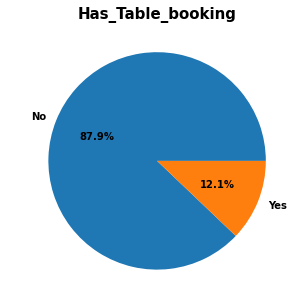

In [256]:
plt.subplots(figsize=(8,5))
data['Has_Table_booking'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Has_Table_booking', fontsize=15,fontweight ='bold')
plt.ylabel( ' ')
plt.show()

#### Observations:

1. Around 88% are custoer Has_Table_booking.
2. 12% customer has not booked their table.

In [257]:
data['Has_Online_delivery'].value_counts()

No     7100
Yes    2451
Name: Has_Online_delivery, dtype: int64

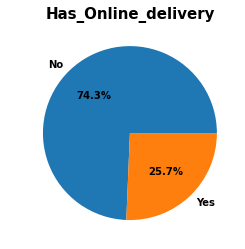

In [258]:
data['Has_Online_delivery'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.title('Has_Online_delivery', fontsize=15,fontweight ='bold')
plt.ylabel( ' ')
plt.show()

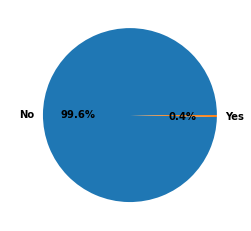

In [259]:
data['Is_delivering_now'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

#### Observations:

1. Around 75% customer has online delivery option.
2. 99.6% customer is negetive response on 'Is_delivering_now'.

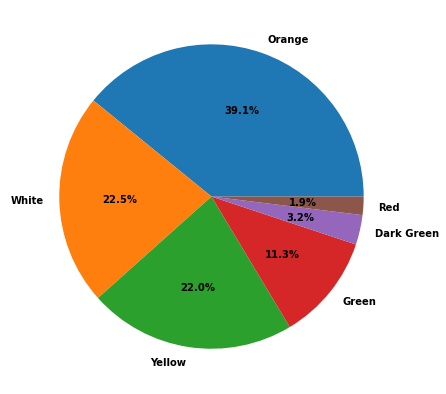

In [260]:
plt.subplots(figsize=(10,7))
data['Rating_color'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

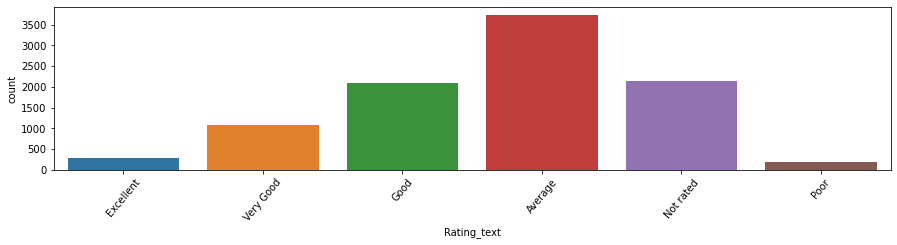

In [261]:
plt.figure(figsize=(15,3))
sns.countplot(data["Rating_text"])
plt.xticks(rotation=50)
plt.show()

#### Observations:

1. Around 40% Rating_color is Orange.
2. Maximum Rating_text is Average.

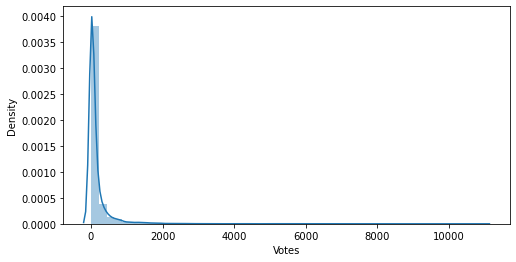

In [262]:
plt.figure(figsize=(8,4))
sns.distplot(data['Votes'])
plt.show()

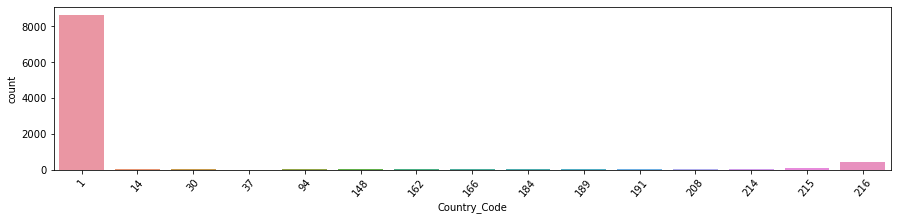

In [263]:
plt.figure(figsize=(15,3))
sns.countplot(data["Country_Code"])
plt.xticks(rotation=50)
plt.show()

#### Observations:

1. Votes is a right skewed data. Maximum votes are for 0.
2. Maximum case is from India and minimum is from Canada.

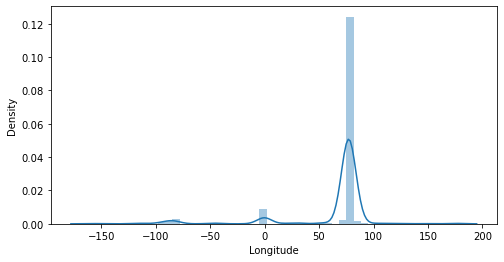

In [264]:
plt.figure(figsize=(8,4))
sns.distplot(data['Longitude'])
plt.show()

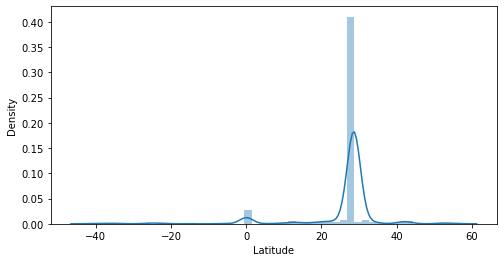

In [265]:
plt.figure(figsize=(8,4))
sns.distplot(data['Latitude'])
plt.show()

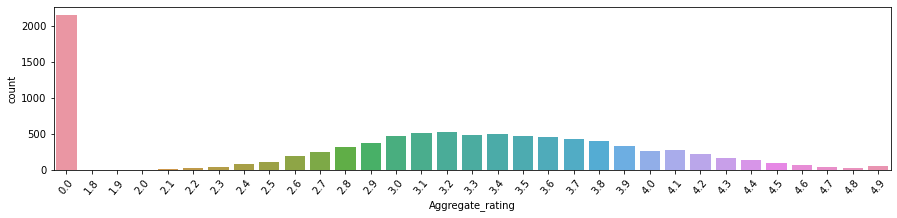

In [266]:
plt.figure(figsize=(15,3))
sns.countplot(data["Aggregate_rating"])
plt.xticks(rotation=50)
plt.show()

#### Observations:

1. Maximum Longitude range is 50-100.
2. Maximum Latitude range is 20-40.
3. Maximum Aggregate_rating is 0.0.

### Target Variable Exploration:

#### 1. Average_Cost_for_two:

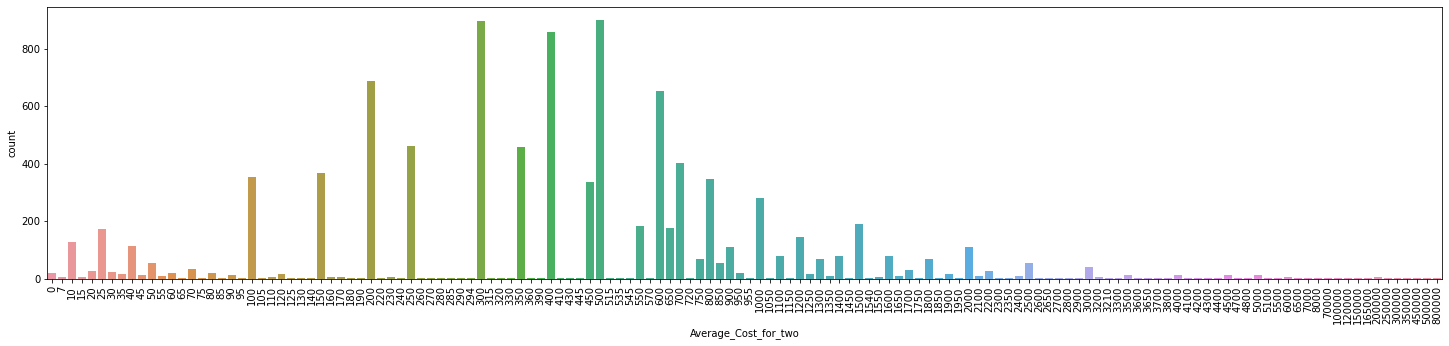

In [267]:
plt.figure(figsize=(25,5))
sns.countplot(data["Average_Cost_for_two"])
plt.xticks(rotation=90)
plt.show()

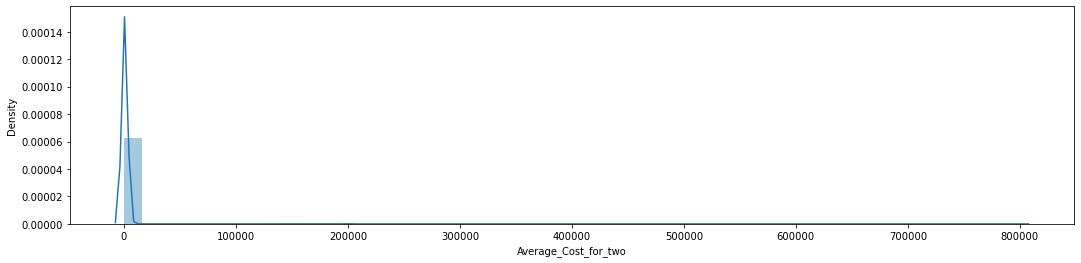

In [268]:
plt.figure(figsize=(18,4))
sns.distplot(data['Average_Cost_for_two'])
plt.show()

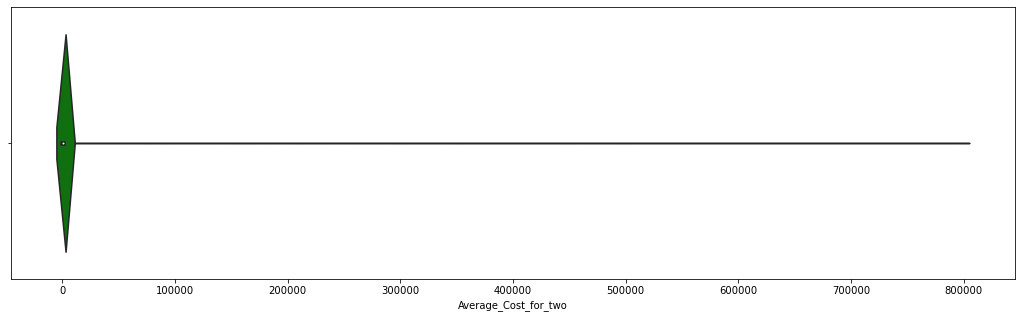

In [269]:
plt.figure(figsize=(18,5))
sns.violinplot(data['Average_Cost_for_two'], color='green')
plt.show()

In [270]:
print('Maximum Average_Cost_for_two value is:',data.Average_Cost_for_two.max())
print('Minimum Average_Cost_for_two value is:',data.Average_Cost_for_two.min())
print('Mean Average_Cost_for_two value is:',data.Average_Cost_for_two.mode()[0])

Maximum Average_Cost_for_two value is: 800000
Minimum Average_Cost_for_two value is: 0
Mean Average_Cost_for_two value is: 500


#### Observations:
1. Average_Cost_for_two is in between 100-1000.
2. Average_Cost_for_two is right skewed.
3. This is a continuous numarical data. Need Regression model to predict this.


#### 2. Price_range:

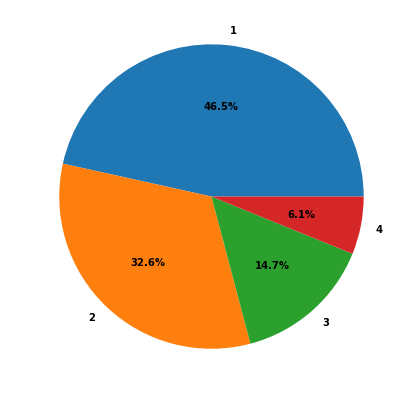

In [271]:
plt.subplots(figsize=(8,7))
data['Price_range'].value_counts().plot.pie(autopct='%2.1f%%', textprops ={ 'fontweight': 'bold','fontsize':10})
plt.ylabel( ' ')
plt.show()

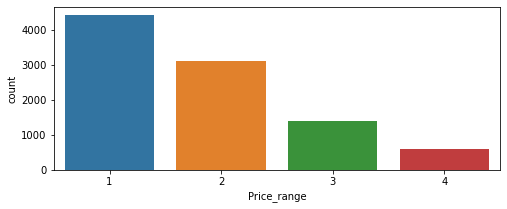

In [272]:
plt.figure(figsize=(8,3))
sns.countplot(data["Price_range"])
plt.show()

#### Observations:

1. Maximum Price_range is 1(around 47%). 
2. Price_range is a discrete numarical data.Needs classification model to predict this.

### Bivariate Analysis:

#### Relation with two target variable, Price_range and Average_Cost_for_two:

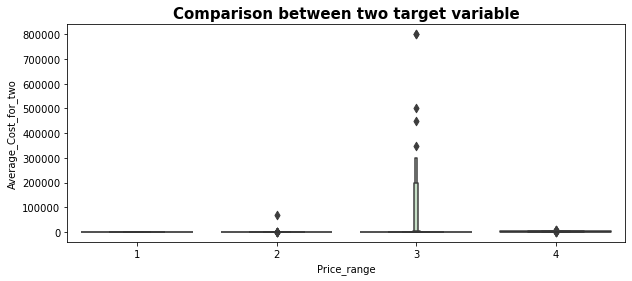

In [273]:
plt.figure(figsize=(10,4))
sns.boxenplot(y = "Average_Cost_for_two", x= "Price_range", data = data)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

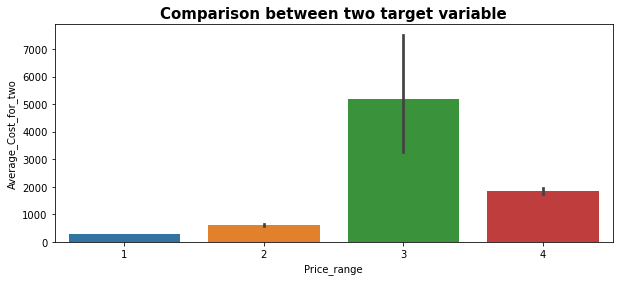

In [274]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Price_range", data = data)
plt.title('Comparison between two target variable', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. For price range 1, Average_Cost_for_two is lowest.
2. Maximum Average_Cost_for_two is for orice range 3.
3. Outliers are present. 

#### Relation with different features and Average_Cost_for_two:

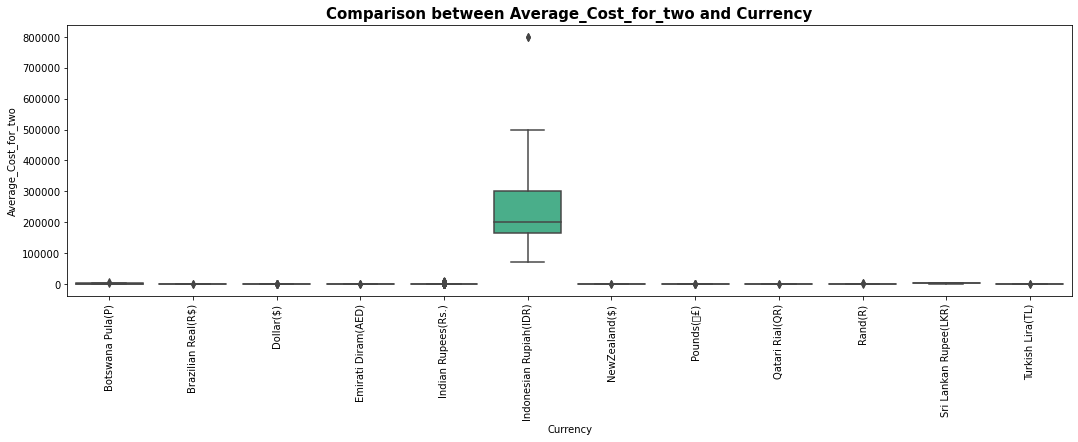

In [275]:
plt.figure(figsize=(18,5))
sns.boxplot(y = "Average_Cost_for_two", x= "Currency", data = data)
plt.title('Comparison between Average_Cost_for_two and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

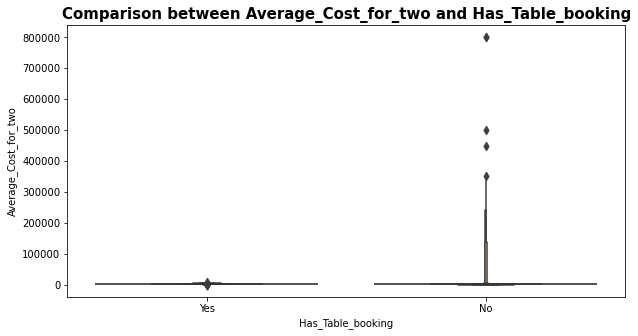

In [276]:
plt.figure(figsize=(10,5))
sns.boxenplot(y = "Average_Cost_for_two", x= "Has_Table_booking", data = data)
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

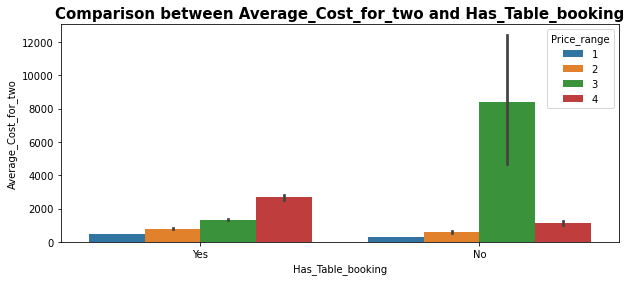

In [277]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Has_Table_booking", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Maximum Average_Cost_for_two is for IND.
2. Maximum customer have no booking of their table.
3. Interestingly, the restaurant with price range level 4 have maximum table booking. The customers who have decided to go for a high price restaurent, booked their table previously.

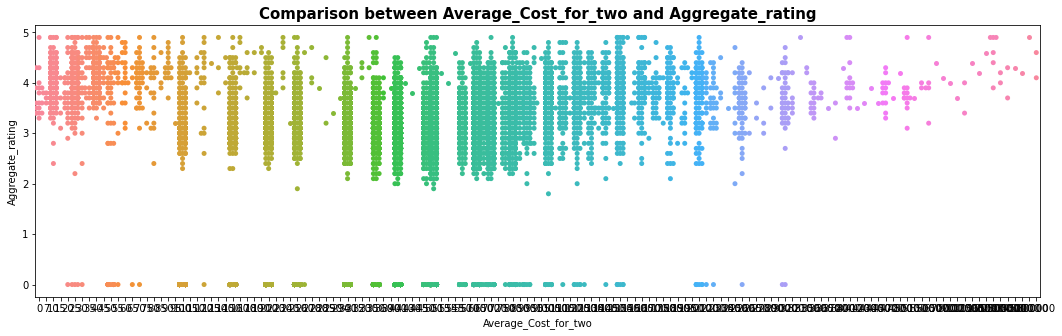

In [278]:
plt.figure(figsize=(18,5))
sns.swarmplot(x = "Average_Cost_for_two", y = "Aggregate_rating", data = data)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

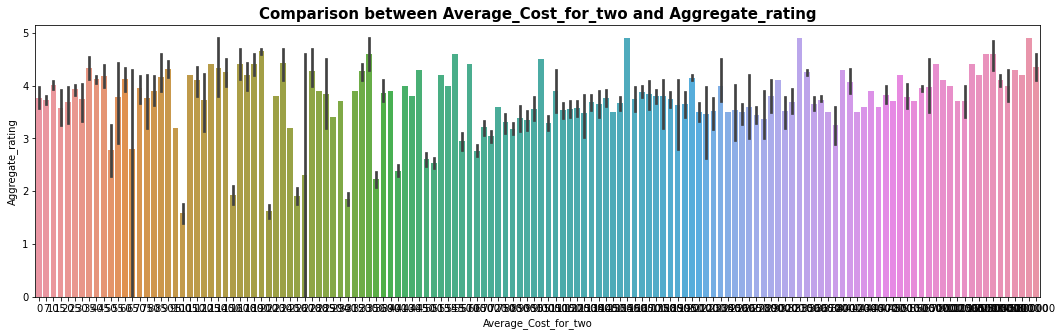

In [138]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Average_Cost_for_two", y = "Aggregate_rating", data = data)
plt.title('Comparison between Average_Cost_for_two and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. For maximum case, if Average_Cost_for_two increased, Aggregate_rating also increased.

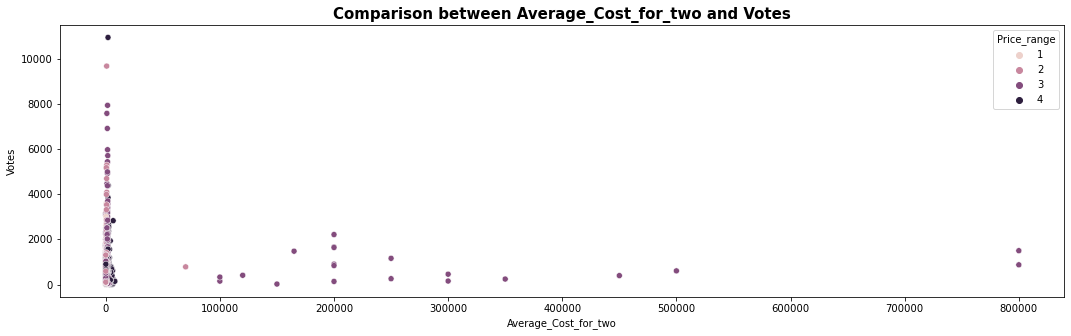

In [279]:
plt.figure(figsize=(18,5))
sns.scatterplot(x = "Average_Cost_for_two", y = "Votes", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Votes', fontsize=15, fontweight='bold')
plt.show()

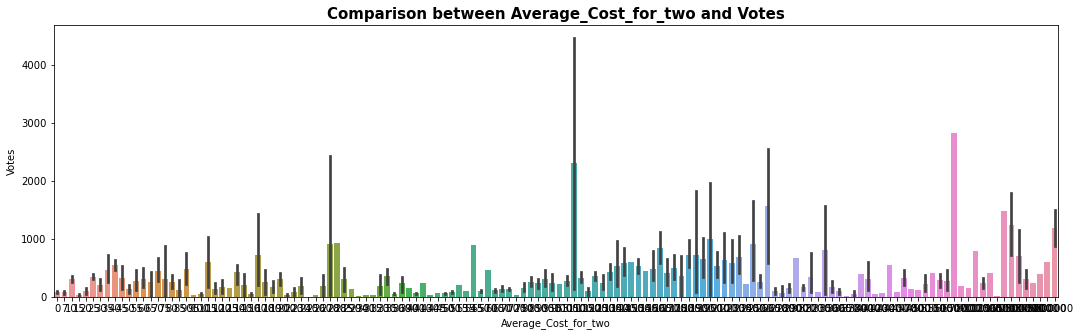

In [280]:
plt.figure(figsize=(18,5))
sns.barplot(x = "Average_Cost_for_two", y = "Votes", data = data)
plt.title('Comparison between Average_Cost_for_two and Votes', fontsize=15, fontweight='bold')
plt.show()

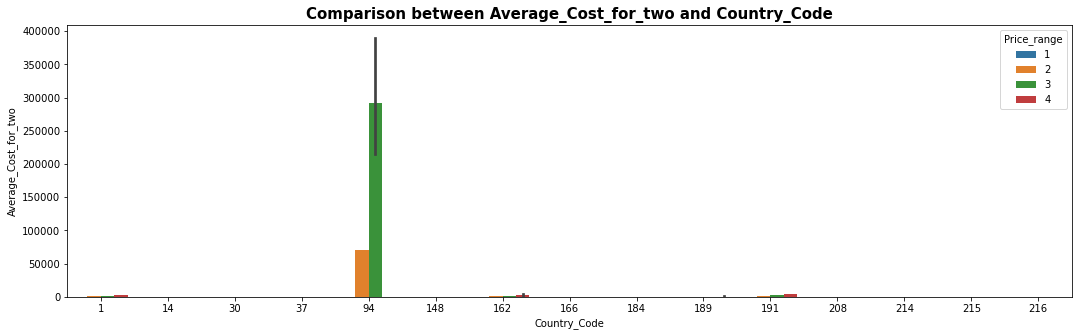

In [281]:
plt.figure(figsize=(18,5))
sns.barplot(y = "Average_Cost_for_two", x= "Country_Code", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Country_Code', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. No such relation between Average_Cost_for_two and Votes.
2. Maximum Average_Cost_for_two is for Indonesia (Country_Code=94).

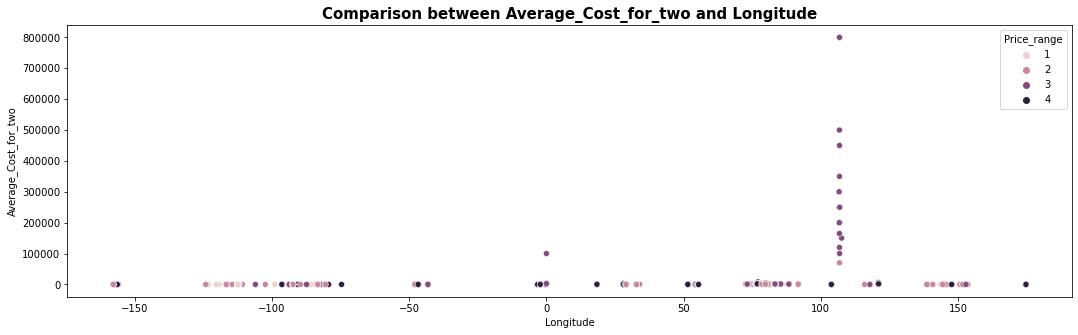

In [60]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average_Cost_for_two", x= "Longitude", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Longitude', fontsize=15, fontweight='bold')
plt.show()

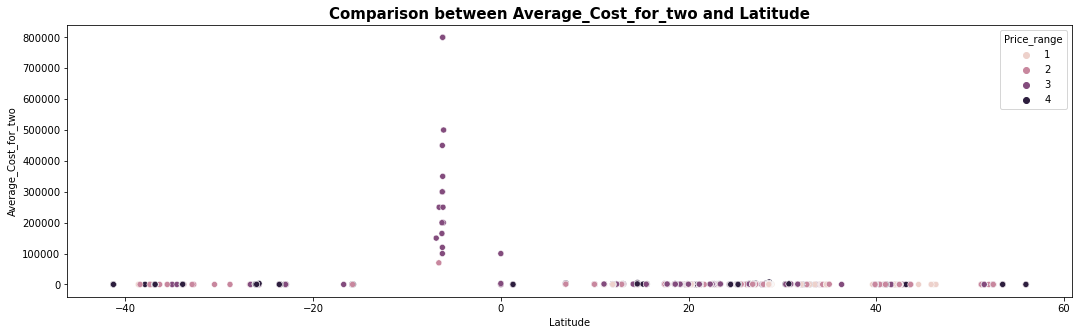

In [282]:
plt.figure(figsize=(18,5))
sns.scatterplot(y = "Average_Cost_for_two", x= "Latitude", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Latitude', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. No such relation is shown from the above plot between Average_Cost_for_two and Latitude, Longitude.

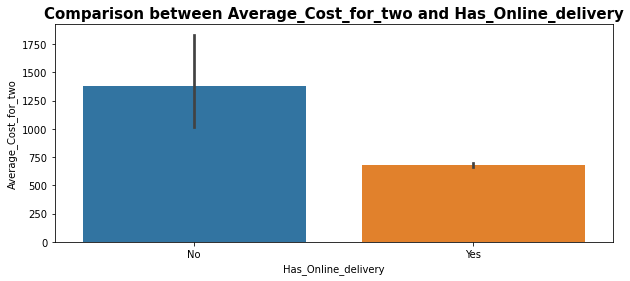

In [71]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Has_Online_delivery", data = data)
plt.title('Comparison between Average_Cost_for_two and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

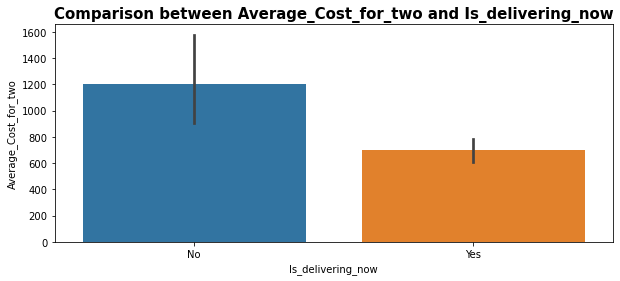

In [141]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Is_delivering_now", data = data)
plt.title('Comparison between Average_Cost_for_two and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Average_Cost_for_two is high for both Is_delivering_now and Has_Online_delivery equal to No.

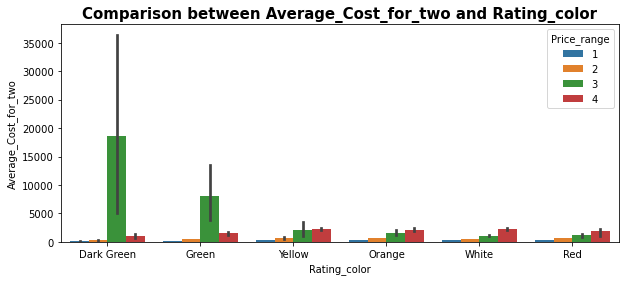

In [78]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Rating_color", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Rating_color', fontsize=15, fontweight='bold')
plt.show()

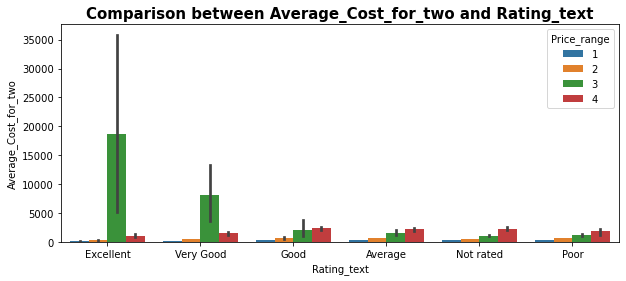

In [79]:
plt.figure(figsize=(10,4))
sns.barplot(y = "Average_Cost_for_two", x= "Rating_text", data = data, hue= 'Price_range')
plt.title('Comparison between Average_Cost_for_two and Rating_text', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Average_Cost_for_two is high for Rating_color equal to Green.
2. Average_Cost_for_two is high for Rating_text equal to Excellent.

### Relation with different features and Price_range:

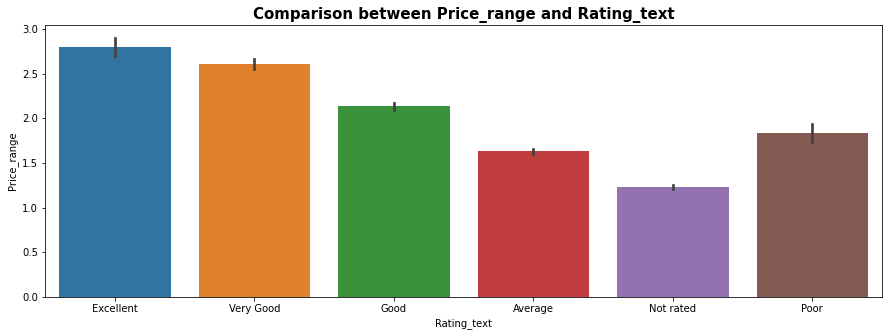

In [82]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price_range", x= "Rating_text", data = data)
plt.title('Comparison between Price_range and Rating_text', fontsize=15, fontweight='bold')
plt.show()

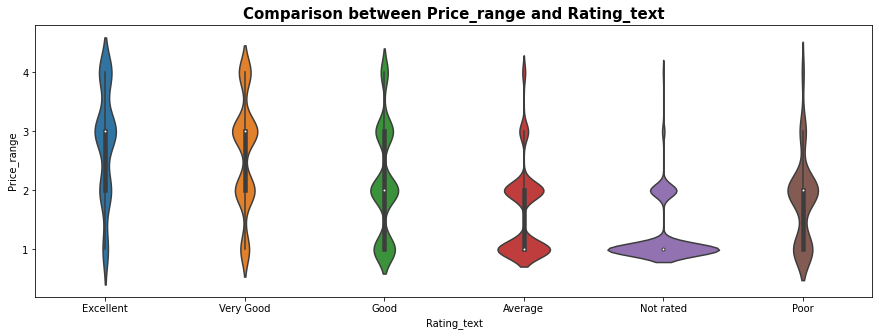

In [93]:
plt.figure(figsize=(15,5))
sns.violinplot(y = "Price_range", x= "Rating_text", data = data)
plt.title('Comparison between Price_range and Rating_text', fontsize=15, fontweight='bold')
plt.show()

In [144]:
pd.crosstab([data.Price_range],data["Rating_text"],margins=True)

Rating_text,Average,Excellent,Good,Not rated,Poor,Very Good,All
Price_range,,,,,,,
1,1898,32,608,1700,62,144,4444
2,1425,69,794,402,98,325,3113
3,313,126,498,35,20,416,1408
4,101,74,200,11,6,194,586
All,3737,301,2100,2148,186,1079,9551


#### Observations:

1. Price_range is high for Excellent Rating_text. It is quite obvious.
2. Total 2148 restaurents are not rated.
3. Maximum restaurent are Average.

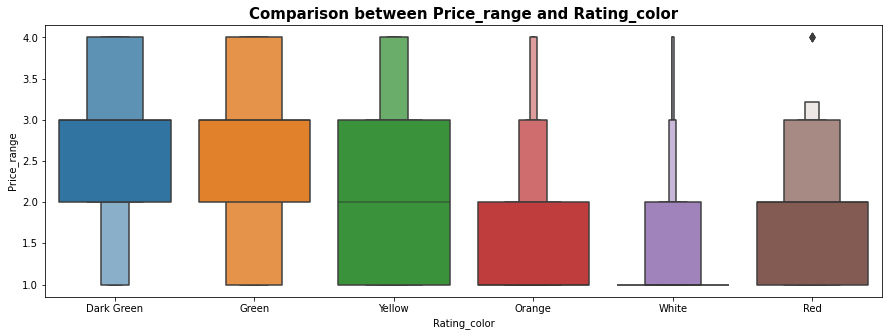

In [87]:
plt.figure(figsize=(15,5))
sns.boxenplot(y = "Price_range", x= "Rating_color", data = data)
plt.title('Comparison between Price_range and Rating_color', fontsize=15, fontweight='bold')
plt.show()

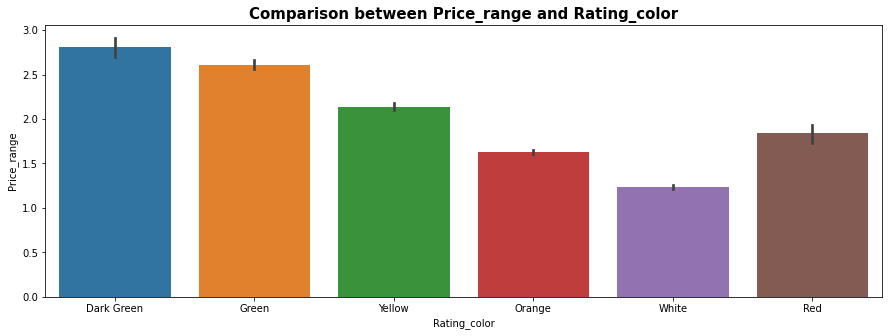

In [145]:
plt.figure(figsize=(15,5))
sns.barplot(y = "Price_range", x= "Rating_color", data = data)
plt.title('Comparison between Price_range and Rating_color', fontsize=15, fontweight='bold')
plt.show()

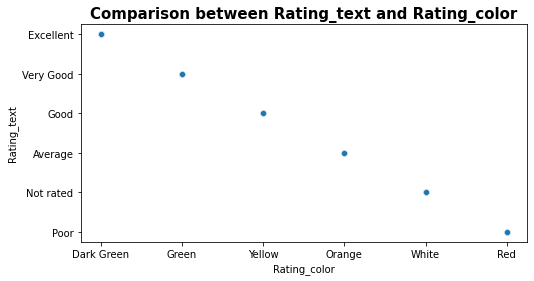

In [150]:
plt.figure(figsize=(8,4))
sns.scatterplot(y = "Rating_text", x= "Rating_color", data = data)
plt.title('Comparison between Rating_text and Rating_color', fontsize=15, fontweight='bold')
plt.show()

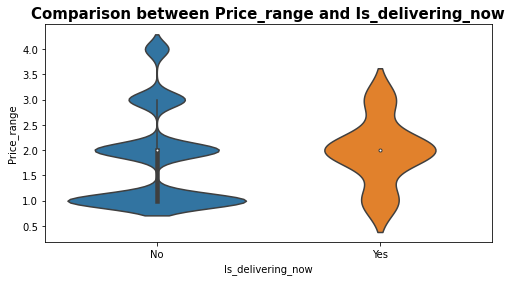

In [92]:
plt.figure(figsize=(8,4))
sns.violinplot(y = "Price_range", x= "Is_delivering_now", data = data)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

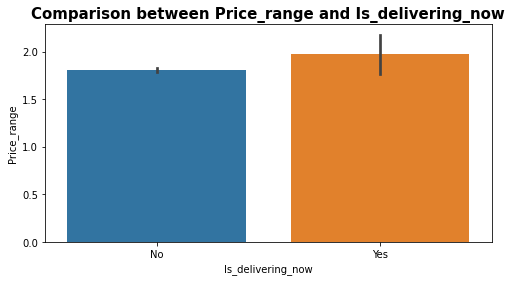

In [97]:
plt.figure(figsize=(8,4))
sns.barplot(y = "Price_range", x= "Is_delivering_now", data = data)
plt.title('Comparison between Price_range and Is_delivering_now', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Maximum Price_range is for Darkgreen color. 
2. Green stands for Excelent and Red stands for Poor.
2. No specific relation is found between Price_range and Is_delivering_now.

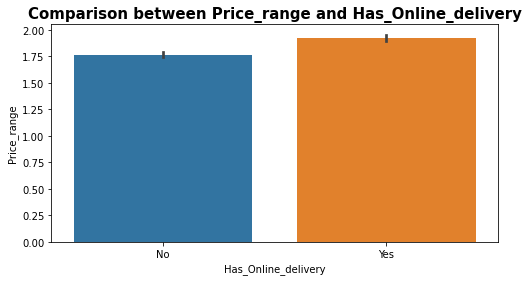

In [98]:
plt.figure(figsize=(8,4))
sns.barplot(y = "Price_range", x= "Has_Online_delivery", data = data)
plt.title('Comparison between Price_range and Has_Online_delivery', fontsize=15, fontweight='bold')
plt.show()

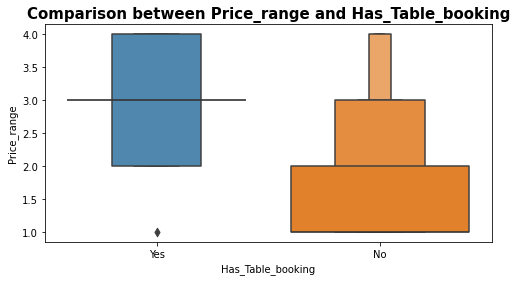

In [153]:
plt.figure(figsize=(8,4))
sns.boxenplot(y = "Price_range", x= "Has_Table_booking", data = data)
plt.title('Comparison between Price_range and Has_Table_booking', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Avg price range is high for Has_Table_booking equal to Yes.
2. No specific relation is found between Price_range and Has_Online_delivery.

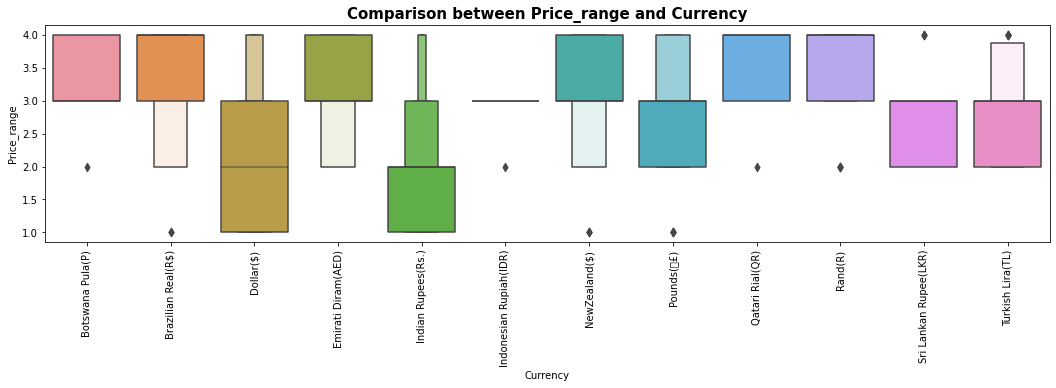

In [104]:
plt.figure(figsize=(18,4))
sns.boxenplot(y = "Price_range", x= "Currency", data = data)
plt.title('Comparison between Price_range and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

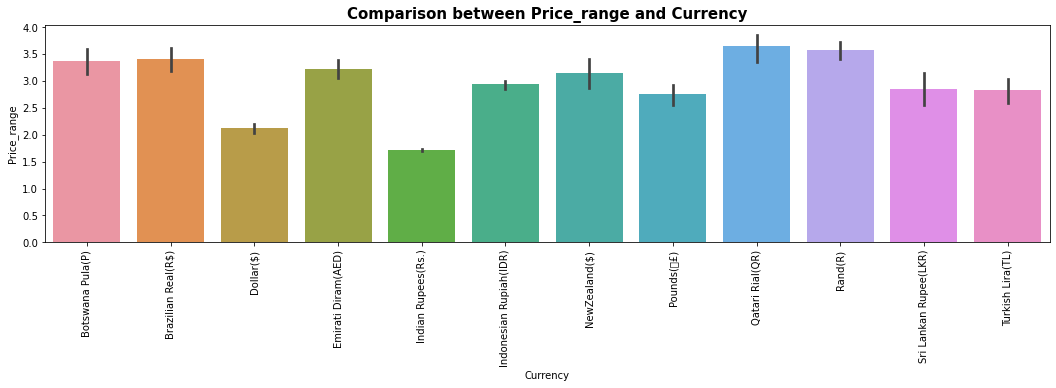

In [105]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price_range", x= "Currency", data = data)
plt.title('Comparison between Price_range and Currency', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)
plt.show()

#### Observations:

1. Prics range is low for Indian Rupees(Rs).
2. Prics range is high for Qatari Rial(QR).

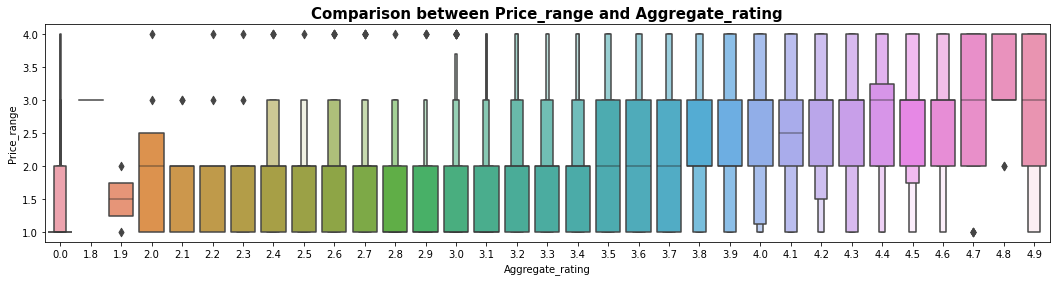

In [108]:
plt.figure(figsize=(18,4))
sns.boxenplot(y = "Price_range", x= "Aggregate_rating", data = data)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

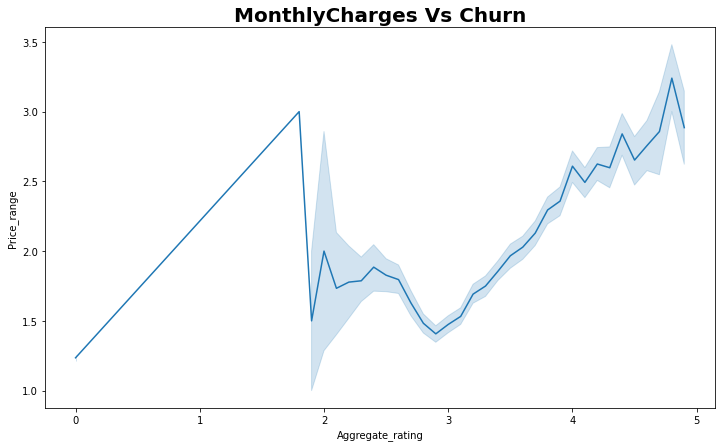

In [154]:
plt.figure(figsize=(12,7))
sns.lineplot(y="Price_range", x='Aggregate_rating',data=data)
plt.title('MonthlyCharges Vs Churn', fontsize=20, fontweight='bold')
plt.show()

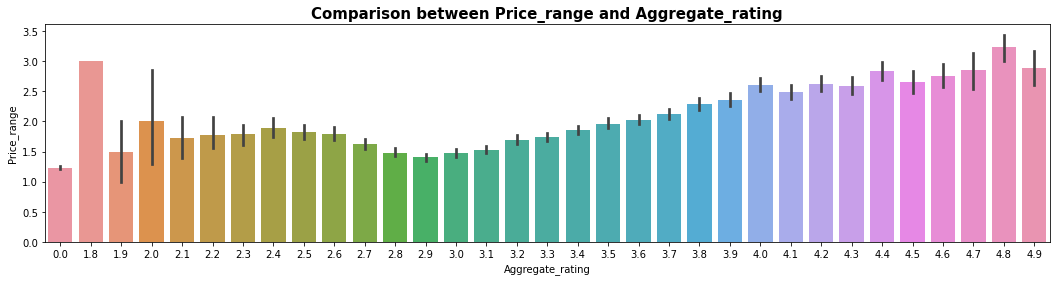

In [109]:
plt.figure(figsize=(18,4))
sns.barplot(y = "Price_range", x= "Aggregate_rating", data = data)
plt.title('Comparison between Price_range and Aggregate_rating', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. If Price_range is high, Aggregate_rating is also high.
2. Max price is for 4.8 ratings.

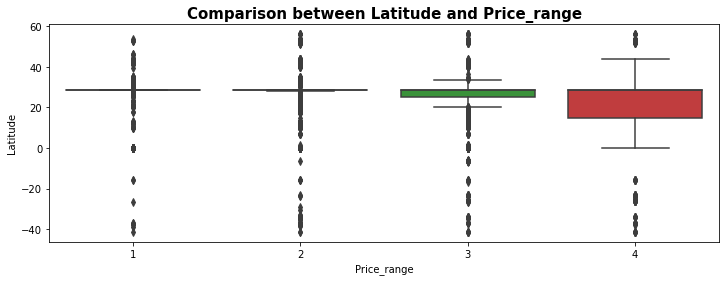

In [116]:
plt.figure(figsize=(12,4))
sns.boxplot(y = "Latitude", x= "Price_range", data = data)
plt.title('Comparison between Latitude and Price_range', fontsize=15, fontweight='bold')
plt.show()

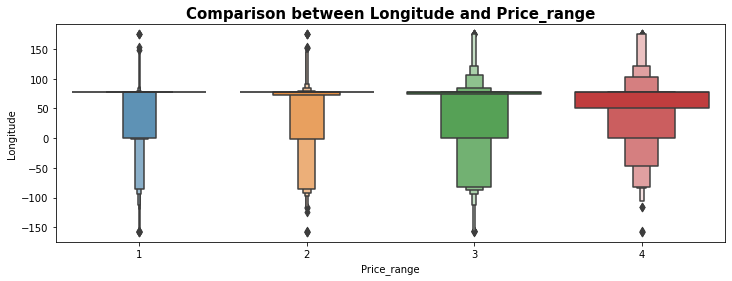

In [118]:
plt.figure(figsize=(12,4))
sns.boxenplot(y = "Longitude", x= "Price_range", data = data)
plt.title('Comparison between Longitude and Price_range', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. No specific relation is found  between Latitude, Longitude and Price_range.

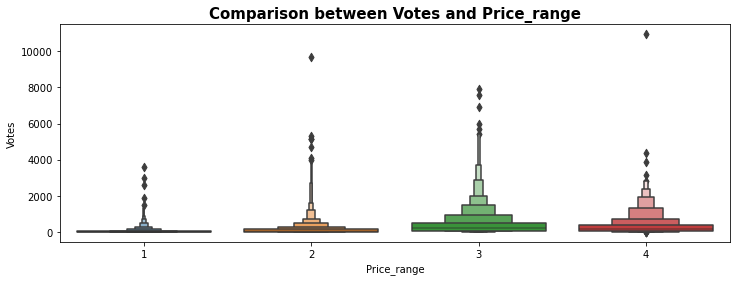

In [119]:
plt.figure(figsize=(12,4))
sns.boxenplot(y = "Votes", x= "Price_range", data = data)
plt.title('Comparison between Votes and Price_range', fontsize=15, fontweight='bold')
plt.show()

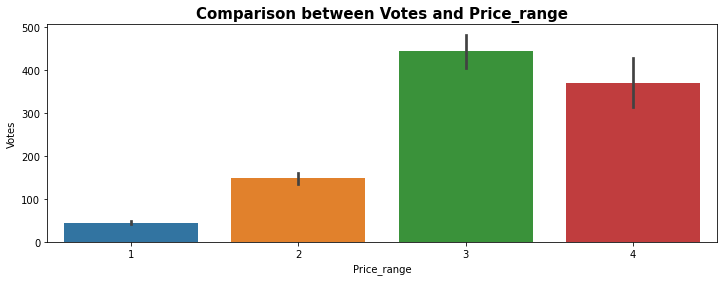

In [120]:
plt.figure(figsize=(12,4))
sns.barplot(y = "Votes", x= "Price_range", data = data)
plt.title('Comparison between Votes and Price_range', fontsize=15, fontweight='bold')
plt.show()

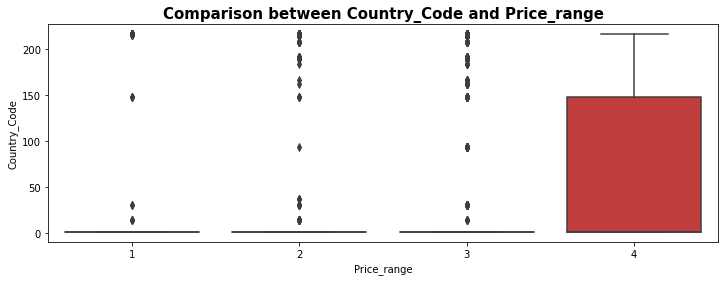

In [124]:
plt.figure(figsize=(12,4))
sns.boxplot(y = "Country_Code", x= "Price_range", data = data)
plt.title('Comparison between Country_Code and Price_range', fontsize=15, fontweight='bold')
plt.show()

#### Observations:

1. Very low votes for Price_range= 1.
2. Maximum votes for Price_range= 3.

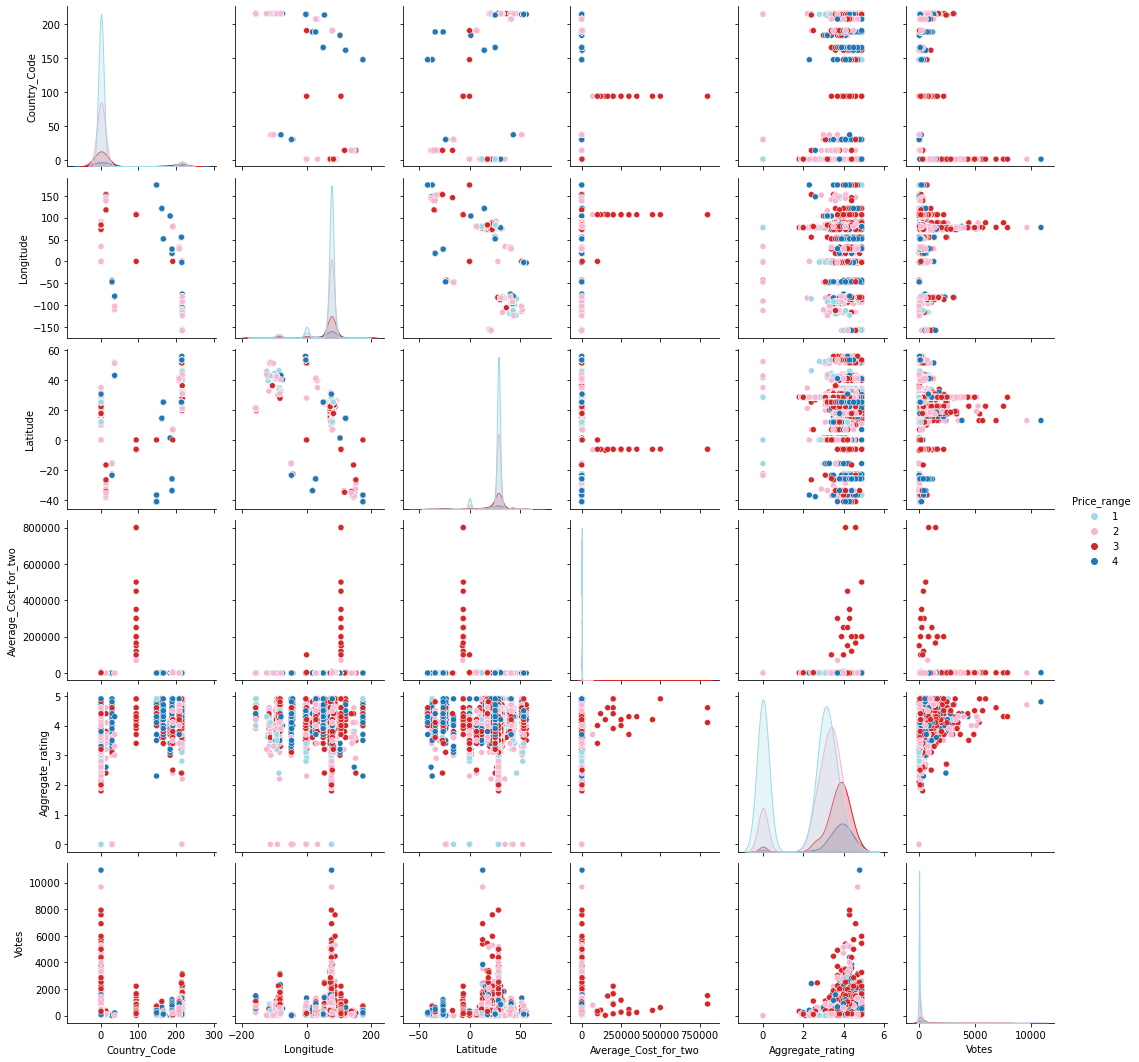

In [155]:
sns.pairplot(data,hue="Price_range",palette="tab20_r" )
plt.show()

#### Observation:

1. Nothing special relationship are found from the above pairplot.

### Encoding for categorical features:

#### Using label encoder:

In [283]:
cat_features= ['Restaurant_Name', 'City', 'Address', 'Locality', 'Locality_Verbose', 'Cuisines', 
             'Currency', 'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now', 'Rating_color', 'Rating_text']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_features:
    data[i] = le.fit_transform(data[i])
data.head()

,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
0,3749,162,73,8685,171,172,121.027535,14.565443,920,1100,0,1,0,0,3,4.8,0,1,314
1,3173,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,3,4.5,0,1,591
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,4,4.4,1,5,270
3,4707,162,75,8690,862,875,121.056475,14.585318,1126,1500,0,0,0,0,4,4.9,0,1,365
4,5523,162,75,8689,862,875,121.057508,14.584450,1122,1500,0,1,0,0,4,4.8,0,1,229


All categorical features are encoded.

### Correlation:

In [284]:
data.corr().T

,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Has_Table_booking,Has_Online_delivery,Is_delivering_now,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes
Restaurant_Name,1.000000,0.020012,-0.001399,0.000763,0.004322,0.004281,-0.001920,0.009922,0.051679,0.019241,0.009669,0.041173,0.028082,0.011984,0.061275,0.029367,-0.007311,0.012131,0.018512
Country_Code,0.020012,1.000000,-0.181728,-0.220342,-0.120075,-0.117543,-0.698299,0.019792,-0.132902,0.043225,-0.033466,-0.061682,-0.154605,-0.018291,0.243327,0.282189,-0.187174,0.222685,0.154530
City,-0.001399,-0.181728,1.000000,-0.019763,0.096444,0.093142,0.117391,-0.004301,0.026614,-0.028838,-0.071996,-0.003762,0.012723,-0.014039,-0.105759,-0.132163,0.110887,-0.098985,-0.078406
Address,0.000763,-0.220342,-0.019763,1.000000,0.159555,0.160495,0.185801,-0.038654,0.023944,0.022749,0.069499,0.006428,0.029874,0.031267,-0.034952,-0.151153,0.071264,-0.008029,-0.101754
Locality,0.004322,-0.120075,0.096444,0.159555,1.000000,0.999465,0.086448,-0.020424,0.006993,-0.012136,0.023723,-0.065594,-0.030993,-0.007299,-0.114459,-0.174336,0.036831,-0.036969,-0.123569
Locality_Verbose,0.004281,-0.117543,0.093142,0.160495,0.999465,1.000000,0.084342,-0.020905,0.005960,-0.011852,0.022966,-0.065132,-0.031766,-0.007353,-0.112313,-0.173254,0.037104,-0.035430,-0.122877
Longitude,-0.001920,-0.698299,0.117391,0.185801,0.086448,0.084342,1.000000,0.043207,0.126197,0.045891,0.337334,0.100488,0.178757,0.018787,-0.078939,-0.116818,0.059979,-0.181466,-0.085101
Latitude,0.009922,0.019792,-0.004301,-0.038654,-0.020424,-0.020905,0.043207,1.000000,0.038151,-0.111088,-0.101864,0.054658,0.118722,0.015001,-0.166688,0.000516,0.042590,-0.129447,-0.022962
Cuisines,0.051679,-0.132902,0.026614,0.023944,0.006993,0.005960,0.126197,0.038151,1.000000,0.005831,0.068912,0.050639,-0.016639,0.007773,-0.005350,-0.080331,-0.016228,-0.079979,-0.032719
Average_Cost_for_two,0.019241,0.043225,-0.028838,0.022749,-0.012136,-0.011852,0.045891,-0.111088,0.005831,1.000000,0.045615,0.007758,-0.018974,-0.001862,0.075083,0.051792,-0.049970,0.031439,0.067783


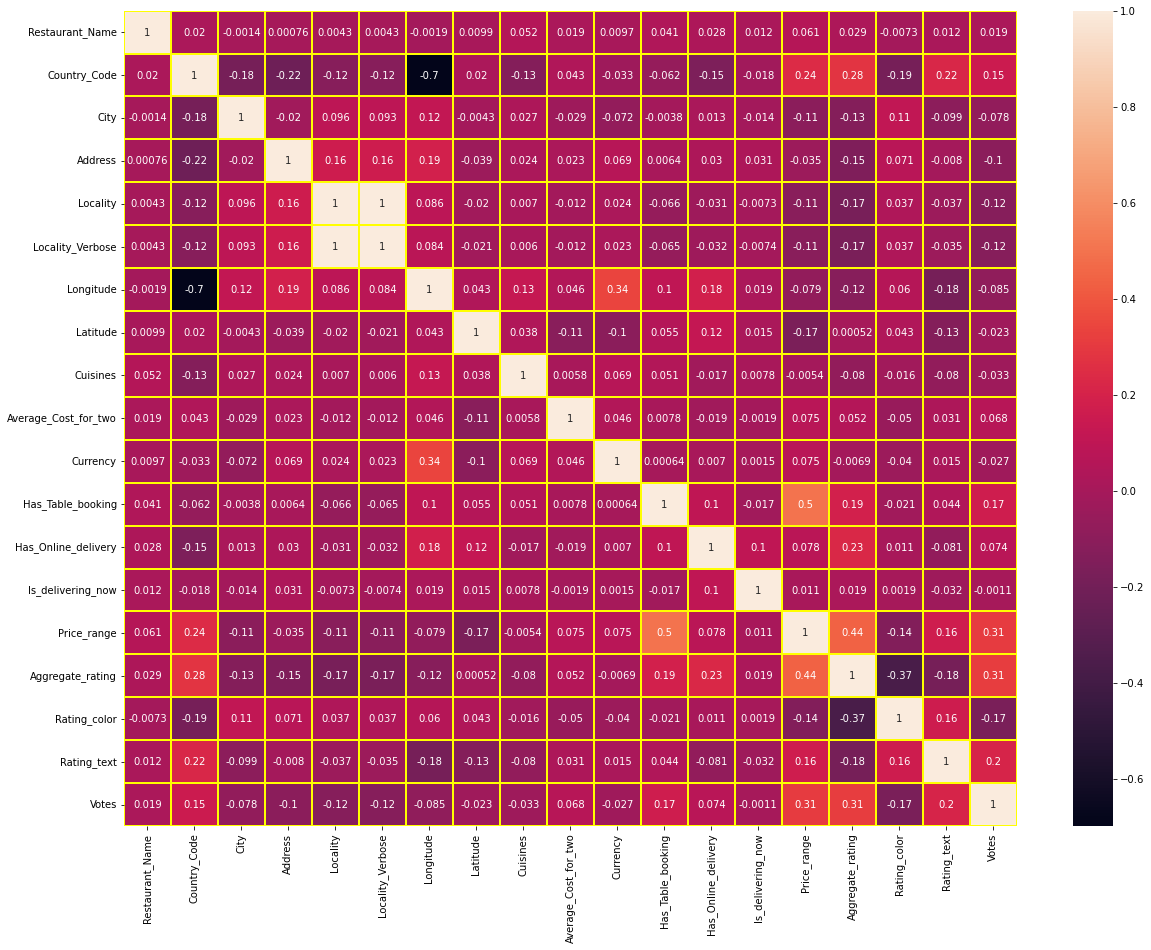

In [285]:
plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(), annot= True, linecolor= "yellow",  linewidths= 2)
plt.show()

#### observations:

1. Correlation is 1 that is 100% between Locality and Locality_Verbose. Let's remove one of them.

In [286]:
data.drop(['Locality_Verbose'], axis=1, inplace =True)
data.shape

(9551, 18)

#### Correlation of Other features with Average_Cost_for_two (target 1):

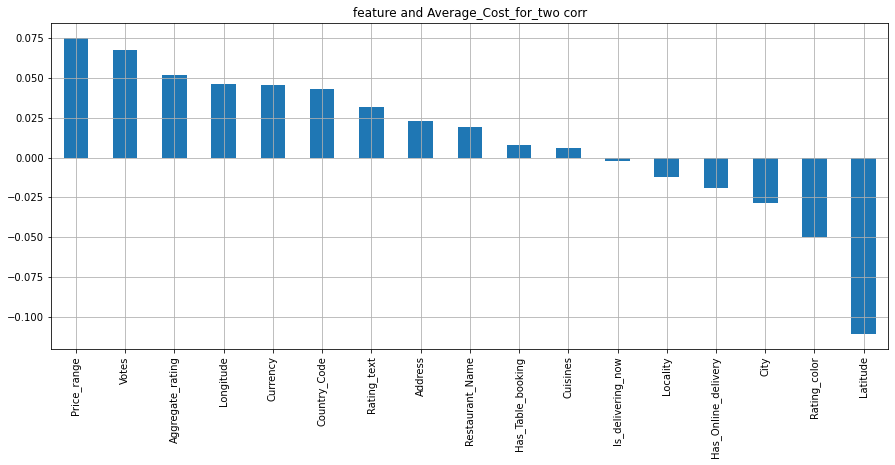

In [287]:
data.drop("Average_Cost_for_two", axis=1).corrwith(data["Average_Cost_for_two"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Average_Cost_for_two corr')
plt.show()

#### Correlation of Other features with Price_range (target 2):

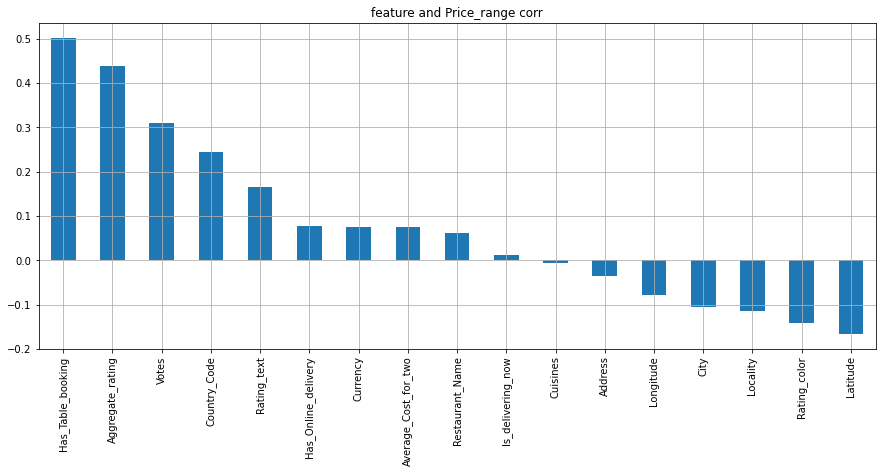

In [288]:
data.drop("Price_range", axis=1).corrwith(data["Price_range"]).sort_values(ascending=False).plot(kind='bar',
        figsize=(15,6),grid='True',title='feature and Price_range corr')
plt.show()

#### Observations:

1. Average_Cost_for_two is highly correlated with Latitude but the relation is negetive.
2. Price_range is highly correlated with Has_Table_booking and the relation is positive.

### Skewness:

In [289]:
data.skew().sort_values()

Latitude                -3.081635
Longitude               -2.807328
City                    -1.193777
Aggregate_rating        -0.954130
Cuisines                -0.307425
Locality                -0.253554
Address                 -0.040407
Restaurant_Name          0.044637
Rating_color             0.046009
Rating_text              0.431408
Price_range              0.889618
Has_Online_delivery      1.114620
Has_Table_booking        2.321100
Currency                 2.858093
Country_Code             3.043965
Votes                    8.807637
Is_delivering_now       16.673412
Average_Cost_for_two    35.477915
dtype: float64

#### Observation :

skewness is present in some columns.

Latitude, Longitude, Aggregate_rating has Skewness in continuous numarical variables. Let's remove the skewness.

In [290]:
skew_data =['Latitude', 'Longitude', 'Aggregate_rating']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

data[skew_data] = scaler.fit_transform(data[skew_data].values)
data[skew_data].skew()

Latitude           -0.293200
Longitude          -0.803832
Aggregate_rating   -0.610806
dtype: float64

#### Observations:

Overall skewness is removed.

## For label 1 (Average_Cost_for_two):


### Checking Multicollinearity:

In [291]:
data1=data.copy()

In [292]:
x = data.drop(['Average_Cost_for_two'], axis =1)
y = data['Average_Cost_for_two']

In [293]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,3.800147,Restaurant_Name
1,2.331744,Country_Code
2,9.878106,City
3,4.345634,Address
4,5.393469,Locality
5,1.485708,Longitude
6,1.222624,Latitude
7,4.633416,Cuisines
8,14.029155,Currency
9,1.640551,Has_Table_booking


#### Observation:

A little bit of Multicollinearity is present in Currency features. But, it is Ok. Let's keep it.

### Standard Scaling:

In [294]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Principal Component Analysis (PCA) :

In [295]:
from sklearn.decomposition import PCA
pca = PCA()

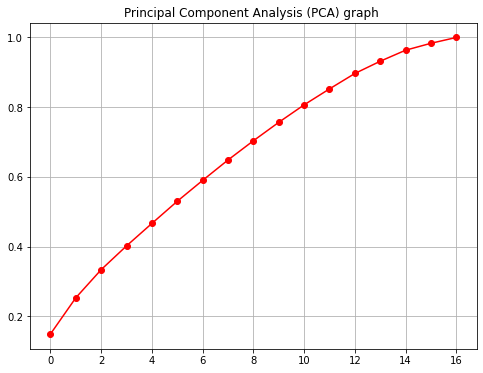

In [296]:
x_pca = pca.fit_transform(x_scale)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.title('Principal Component Analysis (PCA) graph ')
plt.grid()

#### Observations:

Let's keep all of the components.

### Final predictions using different Regression ML Models for Average_Cost_for_two (target 1) :

#### Find best Random state:

In [300]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_max=0
random_max=0
for i in range(500,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.09652613871382643 on Random_state 1500


In [301]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7163, 17)
Training target shape: (7163,)
Test feature shape: (2388, 17)
Test target shape: (2388,)


#### Observations:
**For random state=1500, the accuracy score is best. Lets take this random state for further steps.**

### Using LinearRegression()

In [302]:
x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=1500 )

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.09652613871382643
Mean absolute error: 1919.7687961231068
Mean square error: 143290328.52061558
Root mean square error: 11970.393833145825


#### Using GridSearchCV:

In [303]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [304]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.09652613871382643
Mean absolute error: 1919.7687961231068
Mean square error: 143290328.52061558
Root mean square error: 11970.393833145825


#### Observations:

No such improvement seen after GridSearchCV.
### Using DecisionTreeRegressor():

In [305]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -2.5440634524503443
Mean absolute error: 1308.0402010050252
Mean square error: 562086008.4170854
Root mean square error: 23708.353135911515


#### Using GridSearchCV:

In [306]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,3)}

grid_search = GridSearchCV(estimator = dt,cv=5,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'friedman_mse', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [307]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -2.5472208281466906
Mean absolute error: 1334.4807370184253
Mean square error: 562586766.0152614
Root mean square error: 23718.911568941385


#### Observations:

After using Gridsearch CV, R2 is not improved. This is the wrost fitting model for this dataset because the r2 score is negetive.

### Using KNeighborsRegressor():

In [308]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0,20):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)

RMSE value for k=  1 is: 23043.557192630513
RMSE value for k=  2 is: 16039.54153188544
RMSE value for k=  3 is: 14086.866665165982
RMSE value for k=  4 is: 11879.89314967728
RMSE value for k=  5 is: 11350.249509984107
RMSE value for k=  6 is: 9087.158628553234
RMSE value for k=  7 is: 7840.955027579354
RMSE value for k=  8 is: 6728.898167273276
RMSE value for k=  9 is: 5734.01242532222
RMSE value for k=  10 is: 5083.298415834574
RMSE value for k=  11 is: 4824.074940322721
RMSE value for k=  12 is: 4798.370150463614
RMSE value for k=  13 is: 4715.799796264863
RMSE value for k=  14 is: 4799.5324039755615
RMSE value for k=  15 is: 5010.577392723331
RMSE value for k=  16 is: 5438.932859470948
RMSE value for k=  17 is: 5527.95857177512
RMSE value for k=  18 is: 6169.92518190947
RMSE value for k=  19 is: 6392.409428991067
RMSE value for k=  20 is: 6702.391355810605


In [309]:
min(rmse_val)

4715.799796264863

#### For k=13 we get the best RMSE value for KNeighborsRegressor()

In [310]:
knn =KNeighborsRegressor(n_neighbors= 13)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.8597801711512918
Mean absolute error: 388.2502576987501
Mean square error: 22238767.718451727
Root mean square error: 4715.799796264863


#### Using GridSearchCV

In [311]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree'],
             'leaf_size' : [30,40,25],
             'n_neighbors' : [13],'weights': ['uniform', 'distance']}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 13, 'weights': 'distance'}


In [314]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7974417917621087
Mean absolute error: 466.79957456080695
Mean square error: 32125591.504811894
Root mean square error: 5667.944204454724


#### Observations:

R2 Score and RMSE are not improved after GridSearchCV.

### Using RandomForestRegressor():

In [315]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.6313419557527584
Mean absolute error: 983.3841499162478
Mean square error: 258729704.07412225
Root mean square error: 16085.07706149157


#### Observations:

As r2 score after using Random forest is negetive, it is the wrost model for our dataset.


### Using Support Vector Regression():

In [316]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.003661894911864083
Mean absolute error: 1035.475197273177
Mean square error: 159180081.24862772


In [317]:
from sklearn.svm import SVR
svr_poly = SVR(kernel='poly')
svr_poly.fit(x_train, y_train)

y_pred = svr_poly.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.004030679630544931
Mean absolute error: 1045.1746146252883
Mean square error: 159238570.2495358


In [318]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear', )
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: -0.0029459415230859154
Mean absolute error: 943.5273599210691
Mean square error: 159066531.53714252


#### Using GridSearchCV:

In [319]:
params = {'gamma':['scale', 'auto'],'C':[1.0,0.1], 'kernel':['poly']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv=5)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}


In [320]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.004030679630544931
Mean absolute error: 1045.1746146252883
Mean square error: 159238570.2495358
Root mean square error: 12618.976592796098


#### Observations:


r2 score, RMSE are not improved after using hyperparameter..

### Using GradientBoostingRegressor()

In [321]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -1.0683382218808868
Mean absolute error: 1121.7197020084536
Mean square error: 328037009.15391797
Root mean square error: 18111.791991791368


#### Using GridSearchCV:

In [322]:
params = {'loss': ['squared_error', 'absolute_error'], 'n_estimators':[100,130]}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'loss': 'squared_error', 'n_estimators': 100}


In [323]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -1.0779211619208056
Mean absolute error: 1119.9243263668993
Mean square error: 329556856.8056901
Root mean square error: 18153.700912092005


#### Observations:

r2 score, RMSE are slightly improved after GridSearchCV. this is also wrost fitted model.

### Using AdaBoostRegressor():

In [324]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.3528589800241597
Mean absolute error: 990.5077684308723
Mean square error: 214562497.04198653
Root mean square error: 14647.951974320045


#### Using GridSearchCV:

In [326]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.01] ,
        'n_estimators':[50,60] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}


In [327]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.6438690581082473
Mean absolute error: 1043.5837691541456
Mean square error: 260716493.8295824
Root mean square error: 16146.717741683056


#### Observations:

r2 score, RMSE are  improved after GridSearchCV. This is also wrost model.

#### As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is  KNN Regression() and GradientBoostingRegressor(). 

Let's check the cross validation score before final prediction.

### Cross Validation:

In [328]:
from sklearn.model_selection import cross_val_score

all_models = [grid_lin_best , grid_dt_best , knn , rf , grid_svr_best , grid_gbdt_best, grid_ada_best]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression(fit_intercept='True', n_jobs=1)

 Cross Validation Score :  [-6.23003138e+03 -1.79018986e+01 -2.44810052e+00 -1.04859961e+00
 -5.28649942e-03]

Mean CV Score : -1250.2870539228493

Std deviation : 2489.8807214498092

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor(criterion='friedman_mse', min_samples_leaf=2)

 Cross Validation Score :  [-9.46239061e+03  7.35761998e-01  7.41588587e-01  7.69257827e-01
 -9.54746977e-03]

Mean CV Score : -1892.030708928379

Std deviation : 3785.1799597421027

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=13)

 Cross Validation Score :  [-1.52087308e+02 -3.95115501e+00  7.01529791e-01  6.75954706e-01
 -4.94991895e-03]

Mean CV Score : -30.93318568500169

Std deviation : 60.60165027207565

-----------
-----------
Cross Validation Score of : RandomForestRegressor()

 Cross Validation Score :  [-7.86865029e+03  8.34037268e-01  8.08347010e-01  8.3290431

#### Observations:

here also KNNRegressor is the best model with max cv score and min std.

In [329]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

38.68618616141522

In [330]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.09426717486029668


## Conclusion:

### Our final model is KNN Regressor() for this particular dataset for calculating Average_Cost_for_two_Regression.

## Final Model:

In [332]:
y_pred = knn.predict(x_test)
y_pred

array([ 261.53846154,  269.23076923,  373.07692308, ...,  342.30769231,
        592.30769231, 1573.07692308])

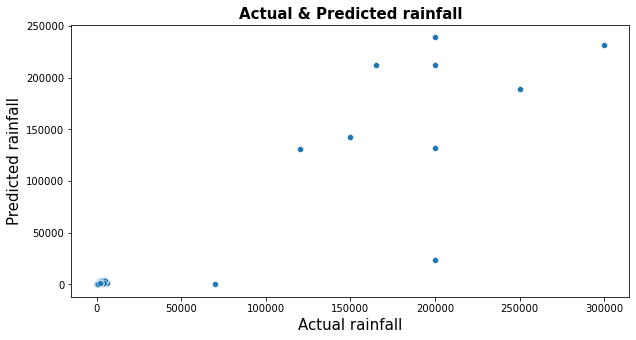

In [333]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,5))
sns.scatterplot(y_test.round(2), y_pred)
plt.xlabel("Actual rainfall", fontsize= 15)
plt.ylabel("Predicted rainfall",fontsize= 15)
plt.title("Actual & Predicted rainfall" , fontsize= 15, fontweight= 'bold')
plt.show()

In [334]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.8597801711512918

Final Mean absolute error: 388.2502576987501

Final Mean square error: 22238767.718451727

Final Root mean square error: 4715.799796264863


### Load and save the model

Now , let's save the model for future use.

In [335]:
import pickle
pickle.dump(knn, open("Average_Cost_for_two_Regression_model", "wb"))

load_Average_Cost_for_two_Regression_model= pickle.load(open("Average_Cost_for_two_Regression_model", "rb"))

In [336]:
y_pred = load_Average_Cost_for_two_Regression_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

,Predicted Values,Actual Values
18,326.923077,250
537,453.846154,300
519,661.538462,400
1196,653.846154,650
489,211.538462,450
945,569.230769,700


## For label 2 (Price_range):

### Checking Multicollinearity:

In [342]:
x = data.drop(['Price_range'], axis =1)
y = data['Price_range']

In [343]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["Features"] = x.columns
vif

,VIF,Features
0,3.776736,Restaurant_Name
1,2.233849,Country_Code
2,9.759963,City
3,4.305798,Address
4,5.383288,Locality
5,1.507421,Longitude
6,1.193568,Latitude
7,4.589888,Cuisines
8,1.046601,Average_Cost_for_two
9,13.001152,Currency


#### Observation:

A little bit of Multicollinearity is present in Currency features. But, it is Ok. Let's keep it.

### Standard Scaling:

In [344]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scale = scaler.fit_transform(x)

### Final predictions using different Classification ML Models for Price_range (target 2) :

#### Find best Random state:

In [345]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

from sklearn.linear_model import LogisticRegression

acc_max=0
random_max=0
for i in range(0, 500):
    x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=i)
    log= LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc= accuracy_score(y_test,y_pred)
    if acc>acc_max:
        acc_max=acc
        random_max=i
        
print('Best accuracy is', acc_max ,'on Random_state', random_max)

Best accuracy is 0.673785594639866 on Random_state 369


**Here the best accuracy on Random_state=369,  Let's take it.**

In [346]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (7163, 17)
Training target shape: (7163,)
Test feature shape: (2388, 17)
Test target shape: (2388,)


### Using LogisticRegression():

In [347]:
from sklearn.linear_model import LogisticRegression

x_train,x_test,y_train,y_test = train_test_split(x_scale,y,test_size = 0.25, random_state=369)

log = LogisticRegression()

log.fit(x_train, y_train)

y_pred = log.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', log.score(x_train, y_train))
print('testing score : ', log.score(x_test, y_test))

accu score :  0.673785594639866
cof_mat:
  [[1005  117   16    0]
 [ 314  371   62    7]
 [  18  125  195   18]
 [   8   29   65   38]]
classification report:
                precision    recall  f1-score   support

           1       0.75      0.88      0.81      1138
           2       0.58      0.49      0.53       754
           3       0.58      0.55      0.56       356
           4       0.60      0.27      0.37       140

    accuracy                           0.67      2388
   macro avg       0.63      0.55      0.57      2388
weighted avg       0.66      0.67      0.66      2388

-----------
-----------
training score :  0.642887058495044
testing score :  0.673785594639866


#### Use GridSearchCV for hyperparameter tuning:

In [350]:
from sklearn.model_selection import GridSearchCV
grid = dict(solver=['newton-cg', 'lbfgs', 'liblinear', 'sag'],penalty=['l2','l1','elasticnet', 'none'], C=[1.0, 0.1,0.01, 0.001]
           , max_iter=[100, 140, 80])

grid_log = GridSearchCV(estimator=log, param_grid= grid, cv=5 )

grid_log.fit(x_train, y_train)
print('best params : ', grid_log.best_params_)

best params :  {'C': 1.0, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}


In [351]:
grid_log_best = grid_log.best_estimator_
grid_log_best.fit(x_train, y_train)

y_pred = grid_log_best.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print ('cof_mat:\n\n ', confusion_matrix(y_test, y_pred))
print('classification report:\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', grid_log_best.score(x_train, y_train))
print('testing score : ', grid_log_best.score(x_test, y_test))

accu score :  0.8622278056951423
cof_mat:

  [[1095   34    8    1]
 [  32  688   27    7]
 [  12   86  239   19]
 [   9    7   87   37]]
classification report:
                precision    recall  f1-score   support

           1       0.95      0.96      0.96      1138
           2       0.84      0.91      0.88       754
           3       0.66      0.67      0.67       356
           4       0.58      0.26      0.36       140

    accuracy                           0.86      2388
   macro avg       0.76      0.70      0.72      2388
weighted avg       0.85      0.86      0.85      2388

-----------
-----------
training score :  0.8545302247661595
testing score :  0.8622278056951423


#### Observations:

Accuracy score is improved after using gridsearchCV .

### Using DecisionTreeClassifier()

In [352]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', clf.score(x_train, y_train))
print('testing score : ', clf.score(x_test, y_test))

accu score :  0.9782244556113903


cof_mat:  [[1133    5    0    0]
 [   3  742    9    0]
 [   0   13  339    4]
 [   0    0   18  122]]


classification report: 

               precision    recall  f1-score   support

           1       1.00      1.00      1.00      1138
           2       0.98      0.98      0.98       754
           3       0.93      0.95      0.94       356
           4       0.97      0.87      0.92       140

    accuracy                           0.98      2388
   macro avg       0.97      0.95      0.96      2388
weighted avg       0.98      0.98      0.98      2388

-----------
-----------
training score :  1.0
testing score :  0.9782244556113903


#### Use GridSearchCV for hyperparameter tuning:

In [355]:
param = {'criterion' : ['gini', 'entropy'], 'splitter': ["best", "random"], 'ccp_alpha': [0.1, .01, 0.001],
        'max_features': ['auto', 'sqrt', 'log2']}

grid_search = GridSearchCV(estimator = clf, cv=5, param_grid = param)

grid_search.fit(x_train, y_train)
print('best params : ', grid_search.best_params_)

best params :  {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}


In [367]:
grid_clf_best = grid_search.best_estimator_
grid_clf_best.fit(x_train, y_train)

y_pred = grid_clf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_clf_best.score(x_train, y_train))
print('testing score : ', grid_clf_best.score(x_test, y_test))

accu score :  0.9539363484087102


cof_mat:  [[1121   15    2    0]
 [  19  713   22    0]
 [   2   17  331    6]
 [   0    2   25  113]]


classification report: 

               precision    recall  f1-score   support

           1       0.98      0.99      0.98      1138
           2       0.95      0.95      0.95       754
           3       0.87      0.93      0.90       356
           4       0.95      0.81      0.87       140

    accuracy                           0.95      2388
   macro avg       0.94      0.92      0.93      2388
weighted avg       0.95      0.95      0.95      2388

-----------
-----------
training score :  0.9625855088650007
testing score :  0.9539363484087102


#### Observations:
Accuracy score is not improved after using GridSearchCV with DecisionTreeClassifier(). 

But the difference between training score, testing score is decreased.  

### Using GradientBoostingClassifier():

In [368]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n\n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', gbdt.score(x_train, y_train))
print('testing score : ', gbdt.score(x_test, y_test))

accu score :  0.9748743718592965


cof_mat:  [[1134    4    0    0]
 [   6  735   13    0]
 [   0   14  338    4]
 [   0    0   19  121]]


classification report: 

               precision    recall  f1-score   support

           1       0.99      1.00      1.00      1138
           2       0.98      0.97      0.98       754
           3       0.91      0.95      0.93       356
           4       0.97      0.86      0.91       140

    accuracy                           0.97      2388
   macro avg       0.96      0.95      0.95      2388
weighted avg       0.98      0.97      0.97      2388

-----------
-----------
training score :  0.9923216529387129
testing score :  0.9748743718592965


#### Using Gridsearch CV:

In [371]:
param= {"min_samples_split" : [2,3],"learning_rate": [0.1,0.01], 
        "criterion":['friedman_mse', 'squared_error'] }

grid_gbdt= GridSearchCV (gbdt, param_grid= param,cv=5)

grid_gbdt.fit(x_train, y_train)
print('best params : ', grid_gbdt.best_params_)

best params :  {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'min_samples_split': 2}


In [374]:
grid_gbdt_best = grid_gbdt.best_estimator_
grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report:\n\n ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_gbdt_best.score(x_train, y_train))
print('testing score : ', grid_gbdt_best.score(x_test, y_test))

accu score :  0.974036850921273


cof_mat:  [[1134    4    0    0]
 [   6  735   13    0]
 [   0   15  337    4]
 [   0    0   20  120]]


classification report:

                precision    recall  f1-score   support

           1       0.99      1.00      1.00      1138
           2       0.97      0.97      0.97       754
           3       0.91      0.95      0.93       356
           4       0.97      0.86      0.91       140

    accuracy                           0.97      2388
   macro avg       0.96      0.94      0.95      2388
weighted avg       0.97      0.97      0.97      2388

-----------
-----------
training score :  0.9928800781795337
testing score :  0.974036850921273


### Observations:
Accuracy score, training score, testing score are not improved after using GridSearchCV with GradientBoostingClassifier()

### Using RandomForestClassifier()

In [375]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', rf.score(x_train, y_train))
print('testing score : ', rf.score(x_test, y_test))

accu score :  0.9736180904522613


cof_mat:  [[1132    4    2    0]
 [   7  736   11    0]
 [   0   15  339    2]
 [   0    0   22  118]]


classification report:                precision    recall  f1-score   support

           1       0.99      0.99      0.99      1138
           2       0.97      0.98      0.98       754
           3       0.91      0.95      0.93       356
           4       0.98      0.84      0.91       140

    accuracy                           0.97      2388
   macro avg       0.96      0.94      0.95      2388
weighted avg       0.97      0.97      0.97      2388

-----------
-----------
training score :  1.0
testing score :  0.9736180904522613


#### Use GridSearchCV for hyperparameter tuning:

In [376]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2,3],
          'criterion' : ["gini", "entropy"]}

rf_grd = GridSearchCV(rf, param_grid = params, cv=5)

rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 150}


In [384]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_rf_best.score(x_train, y_train))
print('testing score : ', grid_rf_best.score(x_test, y_test))

accu score :  0.9752931323283082


cof_mat:  [[1131    5    2    0]
 [   7  737   10    0]
 [   0   11  343    2]
 [   0    0   22  118]]


classification report: 
               precision    recall  f1-score   support

           1       0.99      0.99      0.99      1138
           2       0.98      0.98      0.98       754
           3       0.91      0.96      0.94       356
           4       0.98      0.84      0.91       140

    accuracy                           0.98      2388
   macro avg       0.97      0.94      0.95      2388
weighted avg       0.98      0.98      0.98      2388

-----------
-----------
training score :  1.0
testing score :  0.9752931323283082


#### Observations:
Accuracy score is slightly improved after using GridSearchCV with RandomForestClassifier() 

### ExtraTreesClassifier():

In [385]:
from sklearn.ensemble import ExtraTreesClassifier

etc =ExtraTreesClassifier()
etc.fit(x_train, y_train)

y_pred = etc.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', etc.score(x_train, y_train))
print('testing score : ', etc.score(x_test, y_test))

accu score :  0.9359296482412061


cof_mat:  [[1110   24    2    2]
 [  15  710   27    2]
 [   0   32  314   10]
 [   0    0   39  101]]


classification report:                precision    recall  f1-score   support

           1       0.99      0.98      0.98      1138
           2       0.93      0.94      0.93       754
           3       0.82      0.88      0.85       356
           4       0.88      0.72      0.79       140

    accuracy                           0.94      2388
   macro avg       0.90      0.88      0.89      2388
weighted avg       0.94      0.94      0.94      2388

-----------
-----------
training score :  1.0
testing score :  0.9359296482412061


#### Use GridSearchCV for hyperparameter tuning:

In [386]:
params = {'n_estimators' : [100,80, 150], 'min_samples_leaf': [1,2],
          'criterion' : ["gini", "entropy"]}

etc_grd = GridSearchCV(etc, param_grid = params, cv=5)

etc_grd.fit(x_train, y_train)
print('best params : ', etc_grd.best_params_)

best params :  {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 150}


In [388]:
grid_etc_best = etc_grd.best_estimator_
grid_etc_best.fit(x_train, y_train)

y_pred = grid_etc_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_etc_best.score(x_train, y_train))
print('testing score : ', grid_etc_best.score(x_test, y_test))

accu score :  0.9367671691792295


cof_mat:  [[1114   21    2    1]
 [  13  709   30    2]
 [   0   38  310    8]
 [   0    1   35  104]]


classification report: 
               precision    recall  f1-score   support

           1       0.99      0.98      0.98      1138
           2       0.92      0.94      0.93       754
           3       0.82      0.87      0.85       356
           4       0.90      0.74      0.82       140

    accuracy                           0.94      2388
   macro avg       0.91      0.88      0.89      2388
weighted avg       0.94      0.94      0.94      2388

-----------
-----------
training score :  1.0
testing score :  0.9367671691792295


#### Observations:
Accuracy score is slightly improved after using GridSearchCV with ExtraTreesClassifier()

### Using AdaBoostClassifier:

In [389]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)


print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: ', classification_report(y_test, y_pred))

print("-----------")
print("-----------")

print('training score : ', ada.score(x_train, y_train))
print('testing score : ', ada.score(x_test, y_test))

accu score :  0.8752093802345059


cof_mat:  [[1003  135    0    0]
 [   1  741   10    2]
 [   0   25  318   13]
 [   0    0  112   28]]


classification report:                precision    recall  f1-score   support

           1       1.00      0.88      0.94      1138
           2       0.82      0.98      0.90       754
           3       0.72      0.89      0.80       356
           4       0.65      0.20      0.31       140

    accuracy                           0.88      2388
   macro avg       0.80      0.74      0.73      2388
weighted avg       0.88      0.88      0.87      2388

-----------
-----------
training score :  0.8751919586765322
testing score :  0.8752093802345059


#### Using GridSearchCV for hyperparameter tuning:

In [390]:
params = {'n_estimators' : [50,40, 60, 45], 'learning_rate': [1,0.1,0.01, 0.001] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)

ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'n_estimators': 60}


In [391]:
grid_ada_best = ada_grd.best_estimator_
grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('accu score : ', accuracy_score(y_test, y_pred))
print("\n")
print ('cof_mat: ', confusion_matrix(y_test, y_pred))
print("\n")
print('classification report: \n', classification_report(y_test, y_pred))

print("-----------")
print("-----------")


print('training score : ', grid_ada_best.score(x_train, y_train))
print('testing score : ', grid_ada_best.score(x_test, y_test))

accu score :  0.9057788944723618


cof_mat:  [[1090   48    0    0]
 [  15  727   10    2]
 [   0   25  318   13]
 [   0    0  112   28]]


classification report: 
               precision    recall  f1-score   support

           1       0.99      0.96      0.97      1138
           2       0.91      0.96      0.94       754
           3       0.72      0.89      0.80       356
           4       0.65      0.20      0.31       140

    accuracy                           0.91      2388
   macro avg       0.82      0.75      0.75      2388
weighted avg       0.90      0.91      0.90      2388

-----------
-----------
training score :  0.9056261343012704
testing score :  0.9057788944723618


#### Observations:

Accuracy score is not improved after using GridSearchCV with AdaBoostClassifier().

### Using SVC('rbf'):

In [392]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def svmkernel(ker):
    #svc = SVC(kernel = ker )
    pipe = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = ker))])
    
    pipe.fit(x_train, y_train)
    pipe.score(x_train, y_train)
    predsvc = pipe.predict(x_test)
    print('accu score : ', accuracy_score(y_test, predsvc))
    print("\n")
    print ('cof_mat: ', confusion_matrix(y_test, predsvc))
    print("\n")
    print('classification report: \n\n', classification_report(y_test, predsvc))
    
    print("-----------")
    print("-----------")
    
    
    print('training score : ', pipe.score(x_train, y_train))
    print('testing score : ', pipe.score(x_test, y_test))

In [393]:
svmkernel('rbf')

accu score :  0.6541038525963149


cof_mat:  [[916 209  11   2]
 [299 372  75   8]
 [ 33  81 232  10]
 [ 13  19  66  42]]


classification report: 

               precision    recall  f1-score   support

           1       0.73      0.80      0.76      1138
           2       0.55      0.49      0.52       754
           3       0.60      0.65      0.63       356
           4       0.68      0.30      0.42       140

    accuracy                           0.65      2388
   macro avg       0.64      0.56      0.58      2388
weighted avg       0.65      0.65      0.65      2388

-----------
-----------
training score :  0.639117688119503
testing score :  0.6541038525963149


#### Using SVC ('linear'):

In [394]:
svmkernel('linear')

accu score :  0.8207705192629816


cof_mat:  [[1076   60    2    0]
 [  92  622   40    0]
 [   6   88  262    0]
 [  10    5  125    0]]


classification report: 

               precision    recall  f1-score   support

           1       0.91      0.95      0.93      1138
           2       0.80      0.82      0.81       754
           3       0.61      0.74      0.67       356
           4       0.00      0.00      0.00       140

    accuracy                           0.82      2388
   macro avg       0.58      0.63      0.60      2388
weighted avg       0.78      0.82      0.80      2388

-----------
-----------
training score :  0.8070640792963842
testing score :  0.8207705192629816


#### Using SVC ('poly'):

In [395]:
svmkernel('poly')

accu score :  0.5565326633165829


cof_mat:  [[1087   43    6    2]
 [ 636   71   43    4]
 [ 148   51  153    4]
 [  54   16   52   18]]


classification report: 

               precision    recall  f1-score   support

           1       0.56      0.96      0.71      1138
           2       0.39      0.09      0.15       754
           3       0.60      0.43      0.50       356
           4       0.64      0.13      0.21       140

    accuracy                           0.56      2388
   macro avg       0.55      0.40      0.39      2388
weighted avg       0.52      0.56      0.47      2388

-----------
-----------
training score :  0.5542370515147285
testing score :  0.5565326633165829


#### Observation:

SVC('linear') is better than two others. let's take it for further process.

**Here, RandomForestclassifier() and DecisionTreeClassifier() gives the best accuracy score. Let's check cv with the hyper tunned model of respective ML model.**

### Cross Validtion:

In [397]:
from sklearn.model_selection import cross_val_score
svm_best = Pipeline([('PCA', PCA()),
                ('SVM', SVC(C=7, gamma=0.01, kernel = "linear"))])

all_models = [grid_log_best, clf, gbdt, grid_rf_best, grid_etc_best, grid_ada_best, svm_best ]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv =7)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LogisticRegression(penalty='none', solver='newton-cg')

 Cross Validation Score :  [0.63589744 0.85934066 0.85787546 0.90395894 0.90615836 0.90175953
 0.77785924]

Mean CV Score : 0.8346928033563977

Std deviation : 0.09125918683889771

-----------
-----------
Cross Validation Score of : DecisionTreeClassifier()

 Cross Validation Score :  [0.5992674  0.91208791 0.95824176 0.99926686 1.         0.98607038
 0.84970674]

Mean CV Score : 0.9006630082666949

Std deviation : 0.13296974525251323

-----------
-----------
Cross Validation Score of : GradientBoostingClassifier()

 Cross Validation Score :  [0.65421245 0.94871795 0.95238095 1.         1.         0.98387097
 0.83577713]

Mean CV Score : 0.9107084927361425

Std deviation : 0.11703780488683793

-----------
-----------
Cross Validation Score of : RandomForestClassifier(criterion='entropy', n_estimators=150)

 Cross Validation Score :  [0.65201465 0.94358974 0.95824176 1.         0.99926686 0.97947214
 0.8

#### Observations:

#### Among 7 classification models  RandomForestClassifier() gives good accuracy and maximum f1 score along with a good  Cross-validation score. 

In [398]:
y_pred = grid_rf_best.predict(x_test)
y_pred

array([1, 2, 2, ..., 1, 1, 1], dtype=int64)

In [399]:
y_prob = grid_rf_best.predict_proba(x_test)
from sklearn.metrics import roc_auc_score

macro_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")

macro_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")


print("One-Vs-One AUC ROC Sore: ", macro_ovo, "when avg = macro")
print("==========================")
print("One-Vs-Rest AUC ROC Sore: ", macro_ovr, "when avg = macro")

One-Vs-One AUC ROC Sore:  0.9958489972006208 when avg = macro
One-Vs-Rest AUC ROC Sore:  0.9984794760791522 when avg = macro


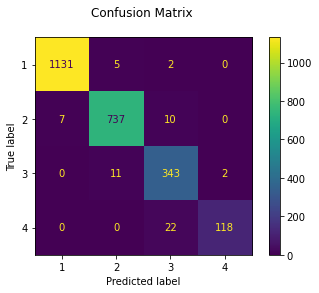

In [400]:
from sklearn import metrics
class_names = data.columns
metrics.plot_confusion_matrix(grid_rf_best, x_test, y_test)
plt.title('Confusion Matrix \n')
plt.show()

### Load and save the model
Now , let's save the model for future use.

In [401]:
import pickle
pickle.dump(grid_rf_best, open("Zomato_Price_range_Classification_model", "wb"))
load_Zomato_Price_range_Classification_model= pickle.load(open("Zomato_Price_range_Classification_model", "rb"))

In [403]:
y_pred = load_Zomato_Price_range_Classification_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n= 8)

,Predicted Values,Actual Values
1806,4,4
729,1,1
2005,2,2
1483,1,1
196,1,1
1667,1,1
78,2,3
293,2,2


In [404]:
features= x.columns
features

Index(['Restaurant_Name', 'Country_Code', 'City', 'Address', 'Locality',
       'Longitude', 'Latitude', 'Cuisines', 'Average_Cost_for_two', 'Currency',
       'Has_Table_booking', 'Has_Online_delivery', 'Is_delivering_now',
       'Aggregate_rating', 'Rating_color', 'Rating_text', 'Votes'],
      dtype='object')

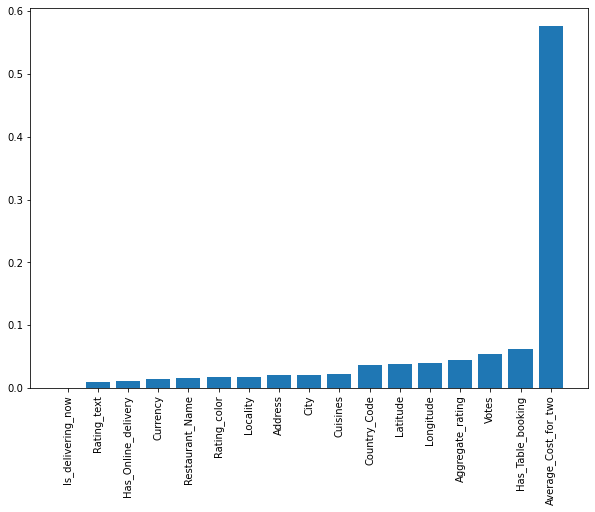

In [406]:
fimp = list(zip(features,grid_rf_best.feature_importances_))
fimp.sort(key = lambda x : x[1])
plt.figure(figsize=(10,7))
plt.bar([x[0] for x in fimp],[x[1] for x in fimp])
plt.xticks(rotation=90)
plt.show()

#### Here Average_Cost_for_two is the most important feature to determine Price_range.